<a href="https://colab.research.google.com/github/Ciro125/clustering-ifood-estudo/blob/main/Clustering_Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
from itables import show
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
# Configurar o Plotly como o backend para os gráficos
pd.options.plotting.backend = "matplotlib"
# Configurar a opção para mostrar todas as colunas
pd.set_option('display.max_columns', None)
# Alterar as opções de exibição do pandas
pd.options.display.float_format = '{:.2f}'.format

# Orders

## Limpeza de dados

In [ ]:
# Carregar o arquivo da base "Orders" em um DataFrame
orders_df = pd.read_csv("orders.csv", error_bad_lines=False, sep=";")

In [ ]:
orders_df

order_id        order_shift order_origin  \
0       000f4c94-ec38-488b-ad98-9bf3ea19d517      weekday lunch   RESTAURANT   
1       0018ed39-3ae0-4047-9c9e-fd9a2027e645     weekend dinner   RESTAURANT   
2       00214248-5a2d-4333-a919-c1f3afd31389     weekday dinner   RESTAURANT   
3       007199e6-6be4-42d0-986c-a0de7650dc80     weekday dinner   RESTAURANT   
4       00bb6d10-0a9b-4fe3-9b25-8d18f50bcc3a      weekday lunch   RESTAURANT   
...                                      ...                ...          ...   
226264  fe810a8e-97be-4a85-a6c0-eb446fd72fd9       weekend dawn   RESTAURANT   
226265  feb7b532-9602-4623-b89d-32697a0b6e17  weekday breakfast   RESTAURANT   
226266  ff54b0d0-6bd3-4bad-a34c-ec64f0b17787     weekday dinner   RESTAURANT   
226267  ff5baa22-a12c-4482-acaf-3e7831a1e764  weekday breakfast   RESTAURANT   
226268  ff72056f-0530-4d33-9180-b9b735817edb      weekend snack   RESTAURANT   

        delivery_fee  scheduled  total_amount  subsidy_amount device_platform  \
0             875.00      False       5375.00            0.00         ANDROID   
1               0.00      False       2987.50         1250.00             IOS   
2               0.00      False       3737.50         2123.75             IOS   
3             862.50      False       2237.50            1.25         DESKTOP   
4               0.00      False       2750.00            0.00         DESKTOP   
...              ...        ...           ...             ...             ...   
226264        375.00      False      10437.50            0.00             IOS   
226265        873.75      False       6348.75            0.00         ANDROID   
226266        875.00      False       8512.50            1.25             IOS   
226267          0.00      False       3500.00          873.75         ANDROID   
226268        612.50      False       5093.75            0.00         ANDROID   

       device_type device_app_version   centroid_id state_label  \
0           MOBILE             9.39.1  -22.83-43.35          RJ   
1           MOBILE             9.63.0  -22.93-43.18          RJ   
2           MOBILE             9.56.0   -23.6-46.64          SP   
3             SITE             8.39.0  -22.96-43.39          RJ   
4             SITE             8.12.0  -23.57-46.64          SP   
...            ...                ...           ...         ...   
226264      MOBILE             9.52.0  -22.95-43.34          RJ   
226265      MOBILE             9.56.0   -23.6-46.61          SP   
226266      MOBILE             9.48.0  -23.58-46.72          SP   
226267      MOBILE             9.68.2  -22.96-43.19          RJ   
226268      MOBILE             9.54.0  -23.62-46.74          SP   

                  city         district  customer_long  customer_lat  \
0       RIO DE JANEIRO      Coelho Neto         -43.35        -22.83   
1       RIO DE JANEIRO         FLAMENGO         -43.18        -22.94   
2            SAO PAULO  Vila Clementino         -46.65        -23.60   
3       RIO DE JANEIRO         Curicica         -43.39        -22.96   
4            SAO PAULO        Liberdade         -46.64        -23.57   
...                ...              ...            ...           ...   
226264  RIO DE JANEIRO             ANIL         -43.34        -22.95   
226265       SAO PAULO        Vila Nair         -46.61        -23.61   
226266       SAO PAULO          Butantã         -46.72        -23.59   
226267  RIO DE JANEIRO         BOTAFOGO         -43.20        -22.96   
226268       SAO PAULO      VILA SUZANA         -46.74        -23.63   

                                            restaurant_id          dish_type  \
0       83c3e069dbd7267a7565a16b879cd968c0968a27ac16e6...  Comida Brasileira   
1       2531d200d387f462ed6e096086723c43b48de9b6c3ec05...  Comida Brasileira   
2       e648c3eeabfbbc52d415e4f2b4bb07ed0206c7fff7fb9c...     Comida Peruana   
3       c3b2f2bc35b781c126ab4e78db73aa5609e55b1eff34c8...              Pizza   
4       63271292b131c157593c309a

In [ ]:
# Remover duplicatas
orders_df = orders_df.drop_duplicates()

# Exemplo: lidar com valores ausentes
orders_df = orders_df.dropna()


In [ ]:
orders_df['delivery_fee'] = orders_df['delivery_fee'] / 100
orders_df['delivery_fee'] = orders_df['delivery_fee'].round(2)

orders_df['total_amount'] = orders_df['total_amount'] / 100
orders_df['total_amount'] = orders_df['total_amount'].round(2)

orders_df['subsidy_amount'] = orders_df['subsidy_amount'] / 100
orders_df['subsidy_amount'] = orders_df['subsidy_amount'].round(2)


In [ ]:
orders_df.shape

(221633, 34)

In [ ]:
dict(orders_df.dtypes)

{'order_id': dtype('O'),
 'order_shift': dtype('O'),
 'order_origin': dtype('O'),
 'delivery_fee': dtype('float64'),
 'scheduled': dtype('bool'),
 'total_amount': dtype('float64'),
 'subsidy_amount': dtype('float64'),
 'device_platform': dtype('O'),
 'device_type': dtype('O'),
 'device_app_version': dtype('O'),
 'centroid_id': dtype('O'),
 'state_label': dtype('O'),
 'city': dtype('O'),
 'district': dtype('O'),
 'customer_long': dtype('float64'),
 'customer_lat': dtype('float64'),
 'restaurant_id': dtype('O'),
 'dish_type': dtype('O'),
 'group_id': dtype('O'),
 'merchant_centroid_id': dtype('O'),
 'merchant_state': dtype('O'),
 'merchant_city': dtype('O'),
 'merchant_district': dtype('O'),
 'merchant_zipcode': dtype('int64'),
 'merchant_long': dtype('float64'),
 'merchant_lat': dtype('float64'),
 'has_free_delivery': dtype('bool'),
 'confirmed_date': dtype('O'),
 'concluded_date': dtype('O'),
 'lag_last_order': dtype('float64'),
 'account_id': dtype('O'),
 'review_score': dtype('float6

In [ ]:
# Calcule a contagem de valores ausentes em cada coluna em %
(100*orders_df.isna().sum()/orders_df.shape[0])

order_id               0.00
order_shift            0.00
order_origin           0.00
delivery_fee           0.00
scheduled              0.00
total_amount           0.00
subsidy_amount         0.00
device_platform        0.00
device_type            0.00
device_app_version     0.00
centroid_id            0.00
state_label            0.00
city                   0.00
district               0.00
customer_long          0.00
customer_lat           0.00
restaurant_id          0.00
dish_type              0.00
group_id               0.00
merchant_centroid_id   0.00
merchant_state         0.00
merchant_city          0.00
merchant_district      0.00
merchant_zipcode       0.00
merchant_long          0.00
merchant_lat           0.00
has_free_delivery      0.00
confirmed_date         0.00
concluded_date         0.00
lag_last_order         0.00
account_id             0.00
review_score           0.00
nps_score              0.00
review_created_at      0.00
dtype: float64

In [ ]:
# Tratando Valores Negativos
orders_df = orders_df[orders_df['delivery_fee'] >= 0]

## Analise Exploratoria

In [ ]:
# Selecionar colunas de tipos numéricos
quantitative_vars_orders = orders_df.select_dtypes(include=['int64', 'float64'])

# Selecionar colunas de tipos não numéricos
qualitative_vars_orders = orders_df.select_dtypes(include=['object'])


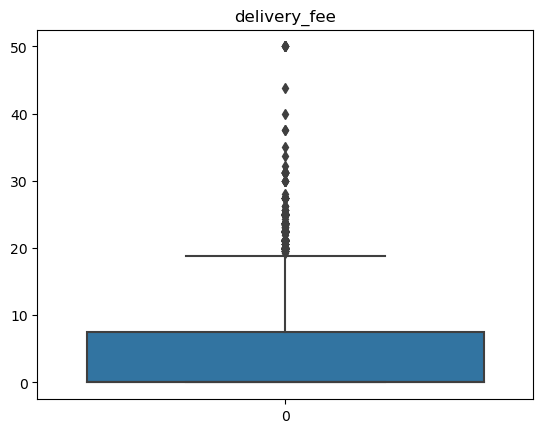

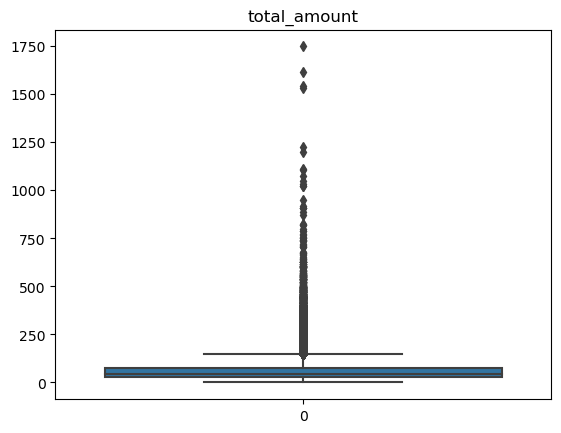

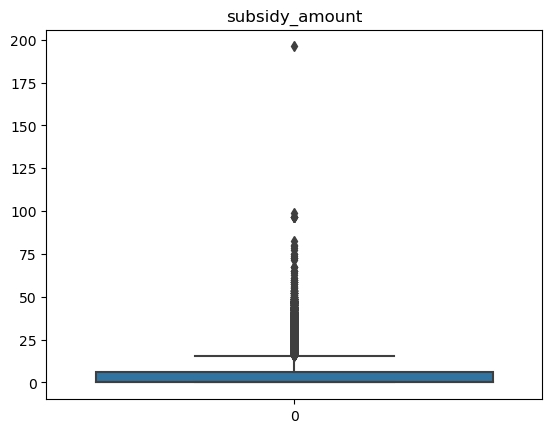

In [ ]:
# Selecionar as colunas específicas
cols_to_plot = ['delivery_fee', 'total_amount', 'subsidy_amount']

# Plotar boxplots para as colunas selecionadas
for column in cols_to_plot:
    plt.figure()  # Cria uma nova figura para cada boxplot
    sns.boxplot(data=orders_df[column])
    plt.title(column)  # Define o título do boxplot como o nome da coluna
    plt.show()

In [ ]:
quantitative_vars_orders.describe()

delivery_fee  total_amount  subsidy_amount  customer_long  \
count     221632.00     221632.00       221632.00      221632.00   
mean           4.08         60.75            3.49         -45.69   
std            5.05         52.02            6.81           2.19   
min            0.00          0.00           -0.02         -67.87   
25%            0.00         28.62            0.00         -46.70   
50%            0.00         46.00            0.00         -46.62   
75%            7.50         76.24            6.24         -43.35   
max           50.00       1748.74          196.11         -34.82   

       customer_lat  merchant_zipcode  merchant_long  merchant_lat  \
count     221632.00         221632.00      221632.00     221632.00   
mean         -23.19       17092595.70         -45.69        -23.19   
std            2.23       21084687.34           2.21          2.23   
min          -31.78              0.00         -67.84        -31.78   
25%          -23.60        4048000.00         -46.70        -23.60   
50%          -23.53        6773290.00         -46.62        -23.53   
75%          -22.94       22221011.00         -43.35        -22.94   
max            2.85       99070060.00          46.79          2.85   

       lag_last_order  review_score  nps_score  
count       221632.00     221632.00  221632.00  
mean             2.53          4.66       9.09  
std             12.09          0.94       1.91  
min              0.00          1.00       1.00  
25%              0.00          5.00       9.00  
50%              1.00          5.00      10.00  
75%              2.00          5.00      10.00  
max           1429.00          5.00      10.00

In [ ]:
qualitative_vars_orders.describe()

order_id    order_shift order_origin  \
count                                 221632         221632       221632   
unique                                221632             10            3   
top     000f4c94-ec38-488b-ad98-9bf3ea19d517  weekday lunch   RESTAURANT   
freq                                       1          57340       215281   

       device_platform device_type device_app_version   centroid_id  \
count           221632      221632             221632        221632   
unique               3           2                212          4131   
top            ANDROID      MOBILE             9.37.1  -23.59-46.75   
freq            117953      202289               9094          2538   

       state_label       city      district  \
count       221632     221632        221632   
unique          27        315          4415   
top             SP  SAO PAULO  Vila Mariana   
freq        126493     112012          3774   

                                            restaurant_id dish_type  \
count                                              221632    221632   
unique                                              37922        61   
top     b673fc594de4cf0015db6620559afe2e29e6acee429683...   Lanches   
freq                                                  405     43905   

                                                 group_id  \
count                                              221632   
unique                                               3494   
top     ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...   
freq                                               142929   

       merchant_centroid_id merchant_state merchant_city merchant_district  \
count                221632         221632        221632            221632   
unique                 5541             27           327              7551   
top             -23.6-46.74             SP     SAO PAULO            Centro   
freq                   2800         126505        110405              3366   

                  confirmed_date            concluded_date  \
count                     221632                    221632   
unique                    221610                    221572   
top     2020-06-24T21:11:13.438Z  2020-02-05T15:31:17.460Z   
freq                           2                         3   

                                  account_id         review_created_at  
count                                 221632                    221632  
unique                                 13861                    221631  
top     d300ac6b-3fd5-4f24-b80e-a2a0066f925c  2020-09-07T15:53:40.389Z  
freq                                     677                         2

In [ ]:
quantitative_vars_orders.corr()

delivery_fee  total_amount  subsidy_amount  customer_long  \
delivery_fee              1.00          0.37           -0.20           0.01   
total_amount              0.37          1.00           -0.06           0.04   
subsidy_amount           -0.20         -0.06            1.00          -0.03   
customer_long             0.01          0.04           -0.03           1.00   
customer_lat              0.03          0.03           -0.02           0.31   
merchant_zipcode          0.03          0.03            0.00          -0.14   
merchant_long             0.01          0.04           -0.03           1.00   
merchant_lat              0.03          0.03           -0.02           0.31   
lag_last_order            0.01          0.02            0.00          -0.01   
review_score             -0.05         -0.08           -0.02          -0.03   
nps_score                -0.05         -0.09           -0.02          -0.03   

                  customer_lat  merchant_zipcode  merchant_long  merchant_lat  \
delivery_fee              0.03              0.03           0.01          0.03   
total_amount              0.03              0.03           0.04          0.03   
subsidy_amount           -0.02              0.00          -0.03         -0.02   
customer_long             0.31             -0.14           1.00          0.31   
customer_lat              1.00              0.09           0.31          1.00   
merchant_zipcode          0.09              1.00          -0.14          0.09   
merchant_long             0.31             -0.14           1.00          0.31   
merchant_lat              1.00              0.09           0.31          1.00   
lag_last_order           -0.00              0.01          -0.01         -0.00   
review_score             -0.02             -0.02          -0.03         -0.02   
nps_score                 0.01             -0.02          -0.03          0.00   

                  lag_last_order  review_score  nps_score  
delivery_fee                0.01         -0.05      -0.05  
total_amount                0.02         -0.08      -0.09  
subsidy_amount              0.00         -0.02      -0.02  
customer_long              -0.01         -0.03      -0.03  
customer_lat               -0.00         -0.02       0.01  
merchant_zipcode            0.01         -0.02      -0.02  
merchant_long              -0.01         -0.03      -0.03  
merchant_lat               -0.00         -0.02       0.00  
lag_last_order              1.00         -0.03      -0.01  
review_score               -0.03          1.00       0.40  
nps_score                  -0.01          0.40       1.00

In [ ]:
corr1 = quantitative_vars_orders.corr()

# Crie uma figura de heatmap usando o Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr1.values,
    x=corr1.columns,
    y=corr1.columns,
    colorscale='RdBu',

))

# Ajuste o tamanho da figura
fig.update_layout(
    title='Matriz de Correlação',
    xaxis_title='Variáveis',
    yaxis_title='Variáveis',
    width=800,  # Defina a largura da figura
    height=600  # Defina a altura da figura
)

# Exiba o gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Agrupar por 'account_id' e calcular a soma do 'total_amount' e o count do 'total_amount'
top_customers_sum = orders_df.groupby('account_id')['total_amount'].sum().nlargest(10)
top_customers_count = orders_df['account_id'].value_counts().nlargest(10)

# Criar DataFrame para cada gráfico
top_customers_sum_df = pd.DataFrame({'account_id': top_customers_sum.index, 'total_amount_sum': top_customers_sum.values})
top_customers_count_df = pd.DataFrame({'account_id': top_customers_count.index, 'total_amount_count': top_customers_count.values})

# Gráfico de barras para os 10 maiores clientes por soma do 'total_amount'
fig1 = px.bar(top_customers_sum_df, x='account_id', y='total_amount_sum', title='Top 10 Customers by Total Amount Sum')

# Gráfico de barras para os 10 maiores clientes por count do 'total_amount'
fig2 = px.bar(top_customers_count_df, x='account_id', y='total_amount_count', title='Top 10 Customers by Total Amount Count')

# Exibir os gráficos
fig1.show()
fig2.show()


In [ ]:
top_customers_sum_df

account_id  total_amount_sum
0  9b41629d-980e-4628-a713-f1d2f83b2426          54561.28
1  51722130-363f-42aa-bef0-70e46434eba9          45278.68
2  779ac29f-d51c-4c79-bc25-118c2966da6f          37899.46
3  bec1e001-4b5a-4bec-b102-c36f8d2c4f6f          36362.96
4  fcb59c75-7ebc-4e48-a6b7-4913079dd86c          33362.33
5  097c4c73-39cd-4b19-bde3-a6a01e0665dc          31732.00
6  f7e6ade2-7cc3-4fa3-aad9-fd71eddea75e          30582.65
7  34be642f-3ec2-4749-a0ab-7f8522370d9d          30145.03
8  9a8fe4ec-2227-4d46-bcec-b71d7856cf4d          27047.77
9  c89a01aa-3b0f-4636-835a-137481d05aa2          25214.74

In [ ]:
top_customers_count_df

account_id  total_amount_count
0  d300ac6b-3fd5-4f24-b80e-a2a0066f925c                 677
1  4091f823-a717-4bbc-a015-a0ddaf6f8235                 582
2  6415a86b-cb49-4586-880c-d0ba667d3a3d                 582
3  01977262-3113-4279-8c12-688cf17de335                 545
4  51722130-363f-42aa-bef0-70e46434eba9                 514
5  32a0375f-e741-45b8-a0ed-8f9030b6598b                 481
6  5d98c73f-31ce-4828-a899-2f9c72c316f4                 476
7  27904b12-b0aa-4ebf-8365-d6d9be4ae295                 474
8  67507313-47a4-43c8-904b-abb0f4744b20                 474
9  622ccfd4-7b66-4058-b3a9-b1c97690d8fb                 474

In [ ]:
# Verificar os 'account_id' em comum entre dois DataFrames
common_accounts = set(top_customers_sum_df['account_id']).intersection(top_customers_count_df['account_id'])

# Verificar se há 'account_id' em comum
if len(common_accounts) > 0:
    print("Os DataFrames têm 'account_id' em comum.")
else:
    print("Os DataFrames não têm 'account_id' em comum.")

print(common_accounts)


Os DataFrames têm 'account_id' em comum.
{'51722130-363f-42aa-bef0-70e46434eba9'}


## Remoção dos Outliers

In [ ]:
from scipy import stats

# Calcular z-scores para 'total_amount', 'delivery_fee' e 'subsidy_amount'
z_scores_total_amount = stats.zscore(orders_df['total_amount'])
z_scores_delivery_fee = stats.zscore(orders_df['delivery_fee'])
z_scores_subsidy_amount = stats.zscore(orders_df['subsidy_amount'])

# Definir limite para considerar como outlier (por exemplo, 3 desvios padrão)
z_score_threshold = 3

# Filtrar apenas os pontos que não são outliers
filtered_orders_df = orders_df[
    (np.abs(z_scores_total_amount) < z_score_threshold) &
    (np.abs(z_scores_delivery_fee) < z_score_threshold) &
    (np.abs(z_scores_subsidy_amount) < z_score_threshold)
]


In [ ]:
# Selecionar colunas de tipos numéricos
quantitative_vars_orders = filtered_orders_df.select_dtypes(include=['int64', 'float64'])

# Selecionar colunas de tipos não numéricos
qualitative_vars_orders = filtered_orders_df.select_dtypes(include=['object'])

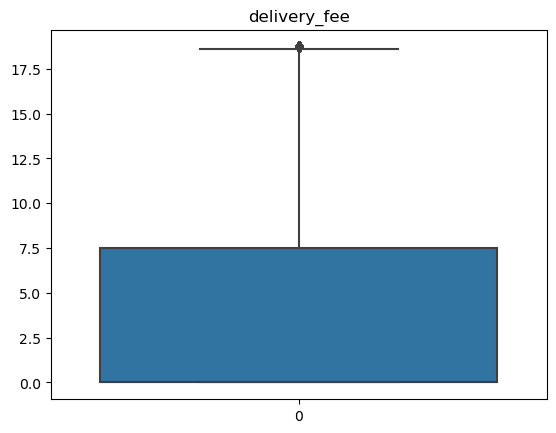

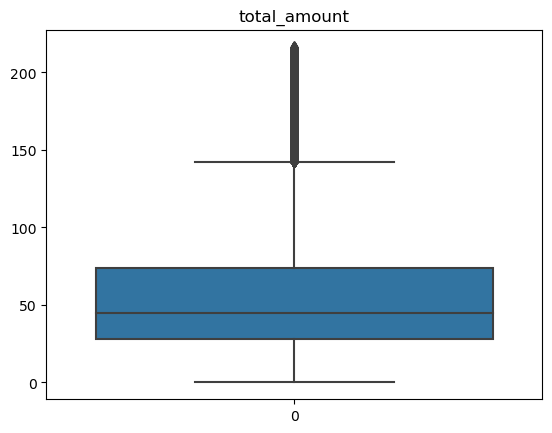

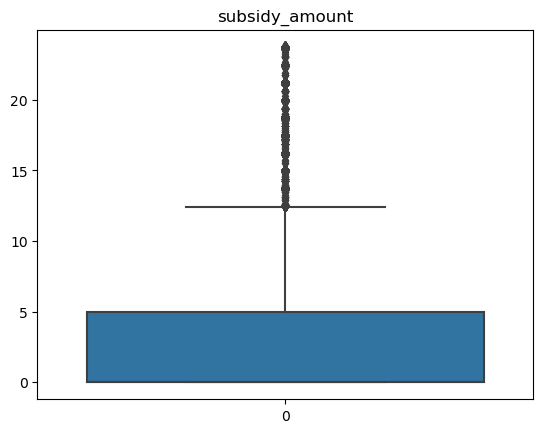

In [ ]:
# Selecionar as colunas específicas
cols_to_plot = ['delivery_fee', 'total_amount', 'subsidy_amount']

# Plotar boxplots para as colunas selecionadas
for column in cols_to_plot:
    plt.figure()  # Cria uma nova figura para cada boxplot
    sns.boxplot(data=filtered_orders_df[column])
    plt.title(column)  # Define o título do boxplot como o nome da coluna
    plt.show()

In [ ]:
quantitative_vars_orders.describe()

delivery_fee  total_amount  subsidy_amount  customer_long  \
count     212579.00     212579.00       212579.00      212579.00   
mean           3.99         56.40            2.92         -45.68   
std            4.89         39.42            5.39           2.20   
min            0.00          0.00           -0.02         -67.82   
25%            0.00         28.12            0.00         -46.70   
50%            0.00         44.98            0.00         -46.62   
75%            7.49         73.75            4.99         -43.35   
max           18.75        216.78           23.78         -34.82   

       customer_lat  merchant_zipcode  merchant_long  merchant_lat  \
count     212579.00         212579.00      212579.00     212579.00   
mean         -23.19       17142483.14         -45.68        -23.19   
std            2.22       21071162.54           2.21          2.22   
min          -31.78              0.00         -67.83        -31.78   
25%          -23.60        4053041.00         -46.70        -23.60   
50%          -23.53        7011010.00         -46.62        -23.53   
75%          -22.94       22221010.00         -43.35        -22.94   
max            2.85       99070060.00          46.79          2.85   

       lag_last_order  review_score  nps_score  
count       212579.00     212579.00  212579.00  
mean             2.53          4.66       9.10  
std             11.95          0.93       1.91  
min              0.00          1.00       1.00  
25%              0.00          5.00       9.00  
50%              1.00          5.00      10.00  
75%              2.00          5.00      10.00  
max           1429.00          5.00      10.00

In [ ]:
qualitative_vars_orders.describe()

order_id    order_shift order_origin  \
count                                 212579         212579       212579   
unique                                212579             10            3   
top     000f4c94-ec38-488b-ad98-9bf3ea19d517  weekday lunch   RESTAURANT   
freq                                       1          55329       206539   

       device_platform device_type device_app_version   centroid_id  \
count           212579      212579             212579        212579   
unique               3           2                212          4075   
top            ANDROID      MOBILE             9.37.1  -23.59-46.75   
freq            113958      193281               8855          2538   

       state_label       city      district  \
count       212579     212579        212579   
unique          27        313          4354   
top             SP  SAO PAULO  Vila Mariana   
freq        120783     107026          3675   

                                            restaurant_id dish_type  \
count                                              212579    212579   
unique                                              37221        61   
top     b673fc594de4cf0015db6620559afe2e29e6acee429683...   Lanches   
freq                                                  402     42478   

                                                 group_id  \
count                                              212579   
unique                                               3412   
top     ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...   
freq                                               138551   

       merchant_centroid_id merchant_state merchant_city merchant_district  \
count                212579         212579        212579            212579   
unique                 5472             27           325              7460   
top             -23.6-46.74             SP     SAO PAULO            Centro   
freq                   2796         120794        105449              3262   

                  confirmed_date            concluded_date  \
count                     212579                    212579   
unique                    212557                    212521   
top     2020-08-05T13:19:04.707Z  2020-02-05T15:31:17.460Z   
freq                           2                         3   

                                  account_id         review_created_at  
count                                 212579                    212579  
unique                                 13653                    212578  
top     d300ac6b-3fd5-4f24-b80e-a2a0066f925c  2020-09-07T15:53:40.389Z  
freq                                     677                         2

In [ ]:
quantitative_vars_orders.corr()

delivery_fee  total_amount  subsidy_amount  customer_long  \
delivery_fee              1.00          0.39           -0.20           0.01   
total_amount              0.39          1.00           -0.08           0.07   
subsidy_amount           -0.20         -0.08            1.00          -0.02   
customer_long             0.01          0.07           -0.02           1.00   
customer_lat              0.03          0.03           -0.03           0.32   
merchant_zipcode          0.03          0.04            0.02          -0.14   
merchant_long             0.01          0.06           -0.02           0.99   
merchant_lat              0.03          0.03           -0.03           0.32   
lag_last_order            0.00          0.02            0.00          -0.01   
review_score             -0.05         -0.09           -0.04          -0.03   
nps_score                -0.05         -0.10           -0.04          -0.03   

                  customer_lat  merchant_zipcode  merchant_long  merchant_lat  \
delivery_fee              0.03              0.03           0.01          0.03   
total_amount              0.03              0.04           0.06          0.03   
subsidy_amount           -0.03              0.02          -0.02         -0.03   
customer_long             0.32             -0.14           0.99          0.32   
customer_lat              1.00              0.09           0.31          1.00   
merchant_zipcode          0.09              1.00          -0.14          0.09   
merchant_long             0.31             -0.14           1.00          0.32   
merchant_lat              1.00              0.09           0.32          1.00   
lag_last_order           -0.00              0.01          -0.01         -0.00   
review_score             -0.02             -0.03          -0.03         -0.02   
nps_score                 0.00             -0.02          -0.03          0.00   

                  lag_last_order  review_score  nps_score  
delivery_fee                0.00         -0.05      -0.05  
total_amount                0.02         -0.09      -0.10  
subsidy_amount              0.00         -0.04      -0.04  
customer_long              -0.01         -0.03      -0.03  
customer_lat               -0.00         -0.02       0.00  
merchant_zipcode            0.01         -0.03      -0.02  
merchant_long              -0.01         -0.03      -0.03  
merchant_lat               -0.00         -0.02       0.00  
lag_last_order              1.00         -0.03      -0.01  
review_score               -0.03          1.00       0.39  
nps_score                  -0.01          0.39       1.00

In [ ]:
corr1 = quantitative_vars_orders.corr()

# Crie uma figura de heatmap usando o Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr1.values,
    x=corr1.columns,
    y=corr1.columns,
    colorscale='RdBu',

))

# Ajuste o tamanho da figura
fig.update_layout(
    title='Matriz de Correlação',
    xaxis_title='Variáveis',
    yaxis_title='Variáveis',
    width=800,  # Defina a largura da figura
    height=600  # Defina a altura da figura
)

# Exiba o gráfico
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Agrupar por 'account_id' e calcular a soma do 'total_amount' e o count do 'total_amount'
top_customers_sum = filtered_orders_df.groupby('account_id')['total_amount'].sum().nlargest(10)
top_customers_count = filtered_orders_df['account_id'].value_counts().nlargest(10)

# Criar DataFrame para cada gráfico
top_customers_sum_df = pd.DataFrame({'account_id': top_customers_sum.index, 'total_amount_sum': top_customers_sum.values})
top_customers_count_df = pd.DataFrame({'account_id': top_customers_count.index, 'total_amount_count': top_customers_count.values})

# Gráfico de barras para os 10 maiores clientes por soma do 'total_amount'
fig1 = px.bar(top_customers_sum_df, x='account_id', y='total_amount_sum', title='Top 10 Customers by Total Amount Sum')

# Gráfico de barras para os 10 maiores clientes por count do 'total_amount'
fig2 = px.bar(top_customers_count_df, x='account_id', y='total_amount_count', title='Top 10 Customers by Total Amount Count')

# Exibir os gráficos
fig1.show()
fig2.show()

In [ ]:
top_customers_sum_df

account_id  total_amount_sum
0  51722130-363f-42aa-bef0-70e46434eba9          36571.86
1  f7e6ade2-7cc3-4fa3-aad9-fd71eddea75e          27602.37
2  fcb59c75-7ebc-4e48-a6b7-4913079dd86c          26919.47
3  097c4c73-39cd-4b19-bde3-a6a01e0665dc          24229.61
4  bec1e001-4b5a-4bec-b102-c36f8d2c4f6f          23033.68
5  886f0503-f5cf-4d75-9f36-c6b8cfcaff6d          22731.00
6  b5cb7c15-5c8c-457d-b4aa-56f9e052716d          22668.87
7  faa80780-5956-4eeb-94ca-e0b21e433f6b          21310.51
8  f16d04d2-50a1-46db-9cbc-191e8014f244          21006.22
9  deb6fa81-5875-4aa5-8c44-54def2ec644c          20564.84

In [ ]:
top_customers_count_df

account_id  total_amount_count
0  d300ac6b-3fd5-4f24-b80e-a2a0066f925c                 677
1  4091f823-a717-4bbc-a015-a0ddaf6f8235                 582
2  6415a86b-cb49-4586-880c-d0ba667d3a3d                 582
3  01977262-3113-4279-8c12-688cf17de335                 545
4  32a0375f-e741-45b8-a0ed-8f9030b6598b                 481
5  51722130-363f-42aa-bef0-70e46434eba9                 478
6  5d98c73f-31ce-4828-a899-2f9c72c316f4                 476
7  67507313-47a4-43c8-904b-abb0f4744b20                 474
8  27904b12-b0aa-4ebf-8365-d6d9be4ae295                 474
9  622ccfd4-7b66-4058-b3a9-b1c97690d8fb                 474

In [ ]:
# Verificar os 'account_id' em comum entre dois DataFrames
common_accounts = set(top_customers_sum_df['account_id']).intersection(top_customers_count_df['account_id'])

# Verificar se há 'account_id' em comum
if len(common_accounts) > 0:
    print("Os DataFrames têm 'account_id' em comum.")
else:
    print("Os DataFrames não têm 'account_id' em comum.")

print(common_accounts)

Os DataFrames têm 'account_id' em comum.
{'51722130-363f-42aa-bef0-70e46434eba9'}


# Marketing

## Limpeza de dados

In [ ]:
# Carregar o arquivo da base "Orders" em um DataFrame
marketing_df = pd.read_csv("Marketing.csv", error_bad_lines=False, sep=";")

In [ ]:
marketing_df

account_id registration_date ifood_status  \
0      7c0450e7-a806-4208-8449-e4269a27e6b5        2020-02-02     Inactive   
1      16d0afba-00b8-427a-ba1f-2e397a9fbb54        2016-05-17        Churn   
2      61c051ee-d37c-45c6-8c22-c236db3b62b7        2018-09-02       Active   
3      82e48692-e4fa-494e-b03e-6815a819b7b1        2017-11-10  Reactivated   
4      382af025-14c8-4ba9-b62f-deddd6f25789        2019-08-05     Inactive   
...                                     ...               ...          ...   
20244  43ca9ecf-4a84-46c0-bddc-08500cc2dadd        2015-08-03     Inactive   
20245  bba67e7e-6760-4f0d-846c-b85af925acf1        2019-03-17     Inactive   
20246  d0ceeec4-3cc6-4878-acf9-a0f4aeb95f66        2020-01-07     Inactive   
20247  e0ec291a-cd2f-428a-a6ab-5f88b5d141dd        2017-08-12     Inactive   
20248  ed2a5774-8181-4d38-94ac-1dd55f3f5da3        2020-02-26     Inactive   

      ifood_status_last_month  total_order_count first_order_date  
0                    Inactive                  8       2020-02-28  
1                      Active                457       2017-03-19  
2                      Active                206       2018-09-02  
3                       Churn                 47       2018-05-01  
4                    Inactive                 66       2019-08-12  
...                       ...                ...              ...  
20244                Inactive               1186       2015-08-17  
20245                Inactive                  4       2019-12-11  
20246                Inactive                  2       2020-02-13  
20247                Inactive                263       2017-08-12  
20248                Inactive                  2       2020-02-27  

[20249 rows x 6 columns]

In [ ]:
# Remover duplicatas
marketing_df = marketing_df.drop_duplicates()

# Exemplo: lidar com valores ausentes
marketing_df = marketing_df.dropna()

In [ ]:
marketing_df.shape

(20248, 6)

In [ ]:
dict(marketing_df.dtypes)

{'account_id': dtype('O'),
 'registration_date': dtype('O'),
 'ifood_status': dtype('O'),
 'ifood_status_last_month': dtype('O'),
 'total_order_count': dtype('int64'),
 'first_order_date': dtype('O')}

In [ ]:
# Calcule a contagem de valores ausentes em cada coluna em %
(100*marketing_df.isna().sum()/marketing_df.shape[0])

account_id                0.00
registration_date         0.00
ifood_status              0.00
ifood_status_last_month   0.00
total_order_count         0.00
first_order_date          0.00
dtype: float64

## Analise Exploratoria

In [ ]:
# Selecionar colunas de tipos numéricos
quantitative_vars_mkt = marketing_df.select_dtypes(include=['int64', 'float64'])

# Selecionar colunas de tipos não numéricos
qualitative_vars_mkt = marketing_df.select_dtypes(include=['object'])

In [ ]:
quantitative_vars_mkt.describe()

total_order_count
count           20248.00
mean              341.34
std               303.15
min                 1.00
25%                91.00
50%               286.00
75%               501.00
max              3098.00

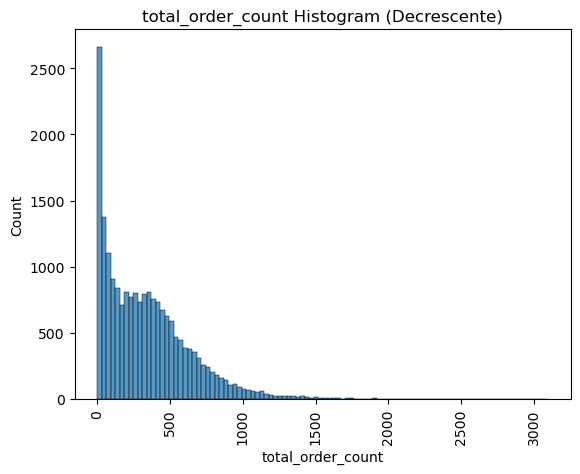

In [ ]:
# Contar valores únicos na coluna 'total_order_count'
total_order_counts = marketing_df['total_order_count'].value_counts().sort_values(ascending=False)

# Plotar histograma para a variável 'total_order_count' em ordem decrescente
plt.figure()
sns.histplot(data=marketing_df, x='total_order_count', bins=100, kde=False)
plt.title('total_order_count Histogram (Decrescente)')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()


In [ ]:
marketing_df.sort_values(by='total_order_count', ascending=False)

account_id registration_date ifood_status  \
10365  23bb6514-7828-4c45-8821-5e902d22bed1        2013-12-14       Active   
1231   e65a2c84-71dd-4d5b-aace-e9962a98e860        2015-05-03       Active   
4774   2fdd220e-104f-4f7f-8f7e-adfebf81a217        2014-10-10       Active   
16530  f7e6ade2-7cc3-4fa3-aad9-fd71eddea75e        2013-01-15       Active   
7616   678f7794-80d5-40ea-a6a7-753cf1a89e89        2013-05-24     Inactive   
...                                     ...               ...          ...   
5693   b42986c8-95dc-4108-9b35-7bf190a83475        2019-12-20     Inactive   
17596  b1ded8d7-8487-4434-bd5e-659ef20d42e8        2020-02-06     Inactive   
5717   0afafd8d-2c21-4291-8178-3a488975712a        2020-02-21     Inactive   
12547  eff59bdd-c795-45d0-80e0-e0ddd96994a7        2020-02-24     Inactive   
17743  6a09672c-f202-4a70-bc4b-cfe9ff08138f        2020-01-02     Inactive   

      ifood_status_last_month  total_order_count first_order_date  
10365                  Active               3098       2012-11-19  
1231                   Active               2890       2015-05-02  
4774                   Active               2719       2014-10-10  
16530             Reactivated               2418       2013-01-15  
7616                 Inactive               2353       2014-05-31  
...                       ...                ...              ...  
5693                 Inactive                  1       2020-02-24  
17596                Inactive                  1       2020-02-06  
5717                 Inactive                  1       2020-02-21  
12547                Inactive                  1       2020-02-29  
17743                Inactive                  1       2020-01-26  

[20248 rows x 6 columns]

In [ ]:
qualitative_vars_mkt.describe()

account_id registration_date ifood_status  \
count                                  20248             20248        20248   
unique                                 20248              2994            4   
top     7c0450e7-a806-4208-8449-e4269a27e6b5        2010-01-05       Active   
freq                                       1                49        11648   

       ifood_status_last_month first_order_date  
count                    20248            20248  
unique                       5             2666  
top                     Active       2020-02-14  
freq                     14080               49

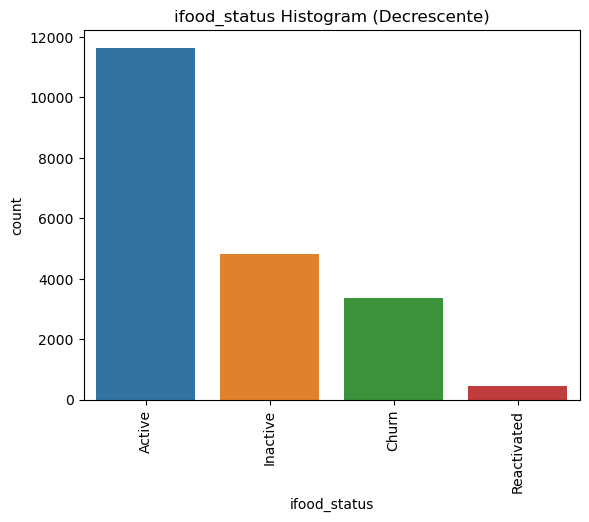

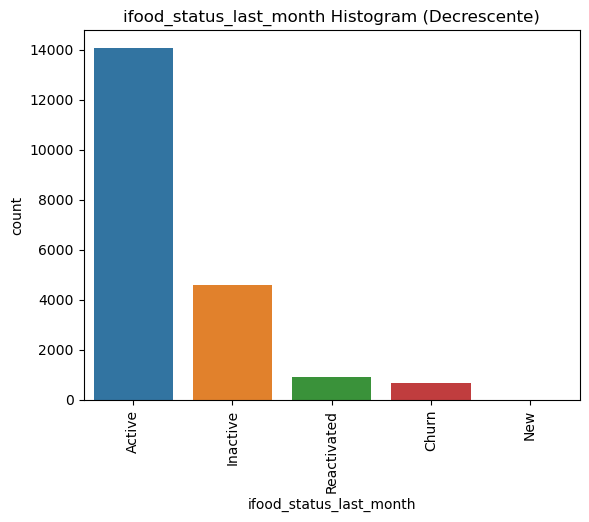

In [ ]:
# Contar valores únicos nas colunas 'ifood_status' e 'ifood_status_last_month'
ifood_status_counts = qualitative_vars_mkt['ifood_status'].value_counts().sort_values(ascending=False)
ifood_status_last_month_counts = qualitative_vars_mkt['ifood_status_last_month'].value_counts().sort_values(ascending=False)

# Plotar histograma para a variável 'ifood_status' em ordem decrescente
plt.figure()
sns.countplot(data=qualitative_vars_mkt, x='ifood_status', order=ifood_status_counts.index)
plt.title('ifood_status Histogram (Decrescente)')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()

# Plotar histograma para a variável 'ifood_status_last_month' em ordem decrescente
plt.figure()
sns.countplot(data=qualitative_vars_mkt, x='ifood_status_last_month', order=ifood_status_last_month_counts.index)
plt.title('ifood_status_last_month Histogram (Decrescente)')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()


# Sessions

## Limpeza de Dados

In [ ]:
# Carregar o arquivo da base "Orders" em um DataFrame
sessions_df = pd.read_csv("sessions.csv", error_bad_lines=False, sep=";")

In [ ]:
sessions_df

session_id  \
0        0a364c77-4375-4334-8f64-a06bdd22229c   
1        b01811cd-ad2c-42f1-bccf-b90698ccc7a8   
2        aa453bd1-da47-4cfa-9ce7-a7e2c9227dec   
3        39ca6d98-c9d1-4dff-9158-c7416be6d309   
4        cf456658-0426-46c2-b6c1-fc27c186e15e   
...                                       ...   
3591506  85770037-9a5c-4ac3-8ba3-ae2b83135e73   
3591507  45072446-a0cd-4747-8de9-07875633c5e0   
3591508  871c9936-e287-439b-88e5-f85e9fdde177   
3591509  bda71adc-50bb-48bd-82cc-647174b3bfa5   
3591510  93b0aedd-ed09-4da9-825e-3a3304ef2016   

                            user_account_uuid           session_started  \
0        5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef  2020-02-01T00:00:03.924Z   
1        20cb43a7-c90d-4451-b067-e1b934746de6  2020-02-01T00:00:09.616Z   
2        b6bd9094-c2f0-471c-b6ec-9475d8d0591b  2020-02-01T00:00:14.479Z   
3        d7ddb2ac-31bf-4e3d-848a-9efc86a70f6d  2020-02-01T00:00:14.650Z   
4        8d9bb514-cc57-4181-bb9d-b94b7fbbfd98  2020-02-01T00:00:41.607Z   
...                                       ...                       ...   
3591506  9b8c5cb4-837d-4457-bf66-ac1ecdf108cd  2020-09-30T23:59:29.388Z   
3591507  9eb99387-ee18-4930-801b-b7201ae46df9  2020-09-30T23:59:37.159Z   
3591508  23aeed54-ec20-448f-8857-d321c18cf411  2020-09-30T23:59:40.218Z   
3591509  4b8bc8a5-cf2d-4d77-bea9-64ed735fe4ec  2020-09-30T23:59:51.837Z   
3591510  2bbf4431-f8db-434f-b8c4-3a40aee0fbd7  2020-09-30T23:59:55.349Z   

                    session_ended install_timestamp  \
0        2020-02-01T00:10:51.217Z               NaN   
1        2020-02-01T00:14:22.713Z               NaN   
2        2020-02-01T00:08:20.102Z               NaN   
3        2020-02-01T00:02:49.615Z               NaN   
4        2020-02-01T00:16:57.415Z               NaN   
...                           ...               ...   
3591506  2020-10-01T00:00:18.295Z               NaN   
3591507  2020-10-01T00:44:50.978Z               NaN   
3591508  2020-10-01T00:01:49.361Z               NaN   
3591509  2020-10-01T00:01:56.597Z               NaN   
3591510  2020-10-01T00:13:19.978Z               NaN   

         sum_view_restaurant_screen  sum_view_dish_screen  sum_click_add_item  \
0                                19                     5                   6   
1                                14                     1                   0   
2                                31                     4                   4   
3                                12                     3                   0   
4                                 4                     0                   0   
...                             ...                   ...                 ...   
3591506                           6                     1                   1   
3591507                           3                     1                   1   
3591508                           0                     0                   0   
3591509                           2                     0                   0   
3591510                          54                    29                   0   

         sum_view_checkout  sum_callback_purchase first_order_has_voucher  \
0                        6                      7                   False   
1                        0                      0                     NaN   
2                        3                      1                   False   
3                        0                      0                     NaN   
4                        0                      0                     NaN   
...                    ...                    ...                     ...   
3591506                  1                      0                     NaN   
3591507                  2                      2                     NaN   
3591508                  0                      0                     NaN   
3591509                  0                      0                     NaN   
3591510                  0                      0               

In [ ]:
# Remover duplicatas
sessions_df = sessions_df.drop_duplicates(subset='session_id')


In [ ]:
sessions_df.shape

(3591511, 15)

In [ ]:
dict(sessions_df.dtypes)

{'session_id': dtype('O'),
 'user_account_uuid': dtype('O'),
 'session_started': dtype('O'),
 'session_ended': dtype('O'),
 'install_timestamp': dtype('O'),
 'sum_view_restaurant_screen': dtype('int64'),
 'sum_view_dish_screen': dtype('int64'),
 'sum_click_add_item': dtype('int64'),
 'sum_view_checkout': dtype('int64'),
 'sum_callback_purchase': dtype('int64'),
 'first_order_has_voucher': dtype('O'),
 'media_campaign': dtype('O'),
 'load_time': dtype('float64'),
 'available_restaurants': dtype('float64'),
 'rownumber': dtype('int64')}

## Analise Exploratoria

In [ ]:
# Selecionar colunas de tipos numéricos
quantitative_vars_sessions = sessions_df.select_dtypes(include=['int64', 'float64'])

# Selecionar colunas de tipos não numéricos
qualitative_vars_sessions = sessions_df.select_dtypes(include=['object'])


In [ ]:
quantitative_vars_sessions.describe()

sum_view_restaurant_screen  sum_view_dish_screen  sum_click_add_item  \
count                  3591511.00            3591511.00          3591511.00   
mean                         6.54                  3.40                1.61   
std                         12.91                  6.02                2.87   
min                          0.00                  0.00                0.00   
25%                          0.00                  0.00                0.00   
50%                          2.00                  1.00                1.00   
75%                          8.00                  4.00                2.00   
max                       2612.00                635.00              302.00   

       sum_view_checkout  sum_callback_purchase  load_time  \
count         3591511.00             3591511.00 2848111.00   
mean                2.02                   0.74      39.95   
std                 4.23                   2.10    1019.38   
min                 0.00                   0.00  -75972.00   
25%                 0.00                   0.00       3.00   
50%                 1.00                   0.00       4.00   
75%                 3.00                   1.00       6.00   
max               422.00                 681.00 1120474.00   

       available_restaurants  rownumber  
count             3591511.00 3591511.00  
mean                 1161.83 1795756.00  
std                  1121.17 1036780.07  
min                     0.00       1.00  
25%                   324.00  897878.50  
50%                   831.00 1795756.00  
75%                  1650.00 2693633.50  
max                  6149.00 3591511.00

In [ ]:
corr2 = quantitative_vars_sessions.corr()

# Crie uma figura de heatmap usando o Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr2.values,
    x=corr2.columns,
    y=corr2.columns,
    colorscale='RdBu',

))

# Ajuste o tamanho da figura
fig.update_layout(
    title='Matriz de Correlação',
    xaxis_title='Variáveis',
    yaxis_title='Variáveis',
    width=800,  # Defina a largura da figura
    height=600  # Defina a altura da figura
)

# Exiba o gráfico
fig.show()

In [ ]:
qualitative_vars_sessions.describe()

session_id  \
count                                3591511   
unique                               3591511   
top     0a364c77-4375-4334-8f64-a06bdd22229c   
freq                                       1   

                           user_account_uuid           session_started  \
count                                3591511                   3591511   
unique                                 20095                   3590984   
top     9ca6a64b-e88c-456a-a42b-c0b1a85d025c  2020-04-23T21:06:55.947Z   
freq                                    1618                         2   

                   session_ended         install_timestamp  \
count                    3545766                     11543   
unique                   3545202                     11534   
top     2020-04-23T22:34:22.184Z  2020-07-16T14:26:27.000Z   
freq                           2                         2   

       first_order_has_voucher media_campaign  
count                   420630          53423  
unique                       2              1  
top                      False       CAMPANHA  
freq                    360336          53423

# Clusterização - Agrupamentos por Clientes

In [ ]:
# Aplicar o groupby com as funções de agregação
grouped_orders = filtered_orders_df.groupby('account_id').agg(
    total_amount_sum=('total_amount', 'sum'),
    total_amount_mean=('total_amount', 'mean'),
    total_orders_count=('order_id', 'count'),
    delivery_fee_mean=('delivery_fee', 'mean'),
    customer_long=('customer_long', 'first'),
    customer_lat=('customer_lat', 'first'),
    review_score_mean=('review_score', 'mean')
)

# Resetar o índice do DataFrame
grouped_orders = grouped_orders.reset_index()

In [ ]:
# Realizar o join entre os DataFrames
merged_df = pd.merge(grouped_orders, marketing_df, on='account_id', how='inner')

In [ ]:
# Dropar as colunas do DataFrame
merged_df = merged_df.drop(['account_id','registration_date', 'first_order_date', 'total_order_count','customer_lat','customer_long'], axis=1)

# Verificar o resultado
merged_df.head()


total_amount_sum  total_amount_mean  total_orders_count  delivery_fee_mean  \
0             27.38              27.38                   1               0.00   
1            186.71              46.68                   4               3.75   
2           1053.23              40.51                  26               2.40   
3            703.43              63.95                  11               7.61   
4            348.54             174.27                   2               6.87   

   review_score_mean ifood_status ifood_status_last_month  
0               5.00       Active                  Active  
1               5.00       Active                  Active  
2               4.73       Active                  Active  
3               4.64       Active                  Active  
4               2.00       Active                  Active

## Normalizar e Codificar os Dados

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Crie uma cópia do dataframe original
merged_df_original = merged_df.copy()

# Colunas numéricas a serem normalizadas
numeric_columns = ['total_amount_sum', 'total_amount_mean', 'total_orders_count', 'delivery_fee_mean', 'review_score_mean']

# Colunas categóricas a serem codificadas
categorical_columns = ['ifood_status', 'ifood_status_last_month']

# Aplicar normalização nas colunas numéricas
scaler = StandardScaler()
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])

# Ajustar o OneHotEncoder aos dados
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(merged_df[categorical_columns])

# Aplicar One-Hot Encoding nas colunas categóricas
transformed_data = encoder.transform(merged_df[categorical_columns])
transformed_columns = encoder.get_feature_names_out(categorical_columns)
transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns, index=merged_df.index)

# Concatenar as colunas numéricas e categóricas transformadas
merged_df_encoded = pd.concat([transformed_df, merged_df[numeric_columns]], axis=1)


In [ ]:
merged_df_encoded

ifood_status_Churn  ifood_status_Inactive  ifood_status_Reactivated  \
0                    0.00                   0.00                      0.00   
1                    0.00                   0.00                      0.00   
2                    0.00                   0.00                      0.00   
3                    0.00                   0.00                      0.00   
4                    0.00                   0.00                      0.00   
...                   ...                    ...                       ...   
13648                0.00                   1.00                      0.00   
13649                1.00                   0.00                      0.00   
13650                0.00                   0.00                      0.00   
13651                0.00                   0.00                      0.00   
13652                0.00                   0.00                      0.00   

       ifood_status_last_month_Churn  ifood_status_last_month_Inactive  \
0                               0.00                              0.00   
1                               0.00                              0.00   
2                               0.00                              0.00   
3                               0.00                              0.00   
4                               0.00                              0.00   
...                              ...                               ...   
13648                           1.00                              0.00   
13649                           0.00                              0.00   
13650                           0.00                              0.00   
13651                           0.00                              0.00   
13652                           0.00                              0.00   

       ifood_status_last_month_Reactivated  total_amount_sum  \
0                                     0.00             -0.44   
1                                     0.00             -0.36   
2                                     0.00              0.09   
3                                     0.00             -0.09   
4                                     0.00             -0.27   
...                                    ...               ...   
13648                                 0.00             -0.39   
13649                                 0.00             -0.41   
13650                                 0.00              0.17   
13651                                 0.00             -0.45   
13652                                 0.00             -0.38   

       total_amount_mean  total_orders_count  delivery_fee_mean  \
0                  -1.13               -0.40              -1.20   
1                  -0.55               -0.32              -0.25   
2                  -0.74                0.29              -0.59   
3                  -0.03               -0.13               0.73   
4                   3.28               -0.37               0.54   
...                  ...                 ...                ...   
13648               1.58               -0.40               1.02   
13649              -1.05               -0.35               0.49   
13650              -0.21                0.15              -0.87   
13651              -1.41               -0.40              -1.20   
13652               0.11               -0.37               1.98   

       review_score_mean  
0                   0.69  
1                   0.69  
2                   0.45  
3                   0.37  
4                  -1.96  
...                  ...  
13648               0.69  
13649               0.69  
13650               0.61  
13651               0.69  
13652               0.25  

[13653 rows x 11 columns]

## K-Means

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

cluster_range = [2, 3, 4, 5, 10, 15, 20]

for n_clusters in cluster_range:
    # Criar uma instância do KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o modelo aos dados
    kmeans.fit(merged_df_encoded)

    # Obter as etiquetas de cluster atribuídas a cada amostra
    labels = kmeans.labels_

    # Calcular as métricas de avaliação
    silhouette = silhouette_score(merged_df_encoded, labels)
    davies_bouldin = davies_bouldin_score(merged_df_encoded, labels)
    calinski = calinski_harabasz_score(merged_df_encoded, labels)

    # Imprimir os resultados
    print(f"Número de clusters: {n_clusters}")
    print(f"Silhouette: {silhouette}")
    print(f"Índice Davies-Bouldin: {davies_bouldin}")
    print(f"Índice Calinski-Harabasz: {calinski}")
    print()


Número de clusters: 2
Silhouette: 0.5332706656980889
Índice Davies-Bouldin: 0.9283223514298611
Índice Calinski-Harabasz: 4034.202772129806

Número de clusters: 3
Silhouette: 0.262890154531222
Índice Davies-Bouldin: 1.3071952137446485
Índice Calinski-Harabasz: 4592.011248341209

Número de clusters: 4
Silhouette: 0.2766774827816358
Índice Davies-Bouldin: 1.1547253669899644
Índice Calinski-Harabasz: 4705.868677516337

Número de clusters: 5
Silhouette: 0.28282262316673223
Índice Davies-Bouldin: 1.1315214634930213
Índice Calinski-Harabasz: 4274.445465582344

Número de clusters: 10
Silhouette: 0.2012574294664949
Índice Davies-Bouldin: 1.325032906778545
Índice Calinski-Harabasz: 3277.8509892662632

Número de clusters: 15
Silhouette: 0.2071845988181733
Índice Davies-Bouldin: 1.2168346420585503
Índice Calinski-Harabasz: 2895.764972859709

Número de clusters: 20
Silhouette: 0.2158056842096455
Índice Davies-Bouldin: 1.1847365679950443
Índice Calinski-Harabasz: 2639.5859830151967



In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters desejado
n_clusters = 4

# Criar uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(merged_df_encoded)

# Obter as etiquetas de cluster atribuídas a cada amostra
labels = kmeans.labels_

# Verificar os rótulos dos clusters
print(labels)


[1 1 1 ... 1 1 2]


## Interpretando os clusteres

In [ ]:
# Adicione a coluna de rótulos de cluster ao dataframe original
merged_df_original['cluster_label'] = labels

In [ ]:
cluster_profiles = merged_df_original.groupby('cluster_label').describe()

In [ ]:
cluster_profiles

total_amount_sum                                          \
                         count    mean     std     min     25%     50%   
cluster_label                                                            
0                      1893.00  171.58  202.54   12.49   63.25  112.92   
1                      6915.00  523.33  727.62    0.37   80.81  221.82   
2                      4183.00  722.36  942.52   26.12  156.31  346.47   
3                       662.00 7588.24 4193.47 1031.96 4768.55 6490.08   

                               total_amount_mean                          \
                  75%      max             count  mean   std   min   25%   
cluster_label                                                              
0              198.22  2507.11           1893.00 69.00 35.19 12.49 43.75   
1              616.90  4477.59           6915.00 46.97 18.05  0.03 33.73   
2              841.50  6481.77           4183.00 93.62 31.88 24.99 71.51   
3             9454.80 36571.86            662.00 61.14 29.51  2.30 38.54   

                                  total_orders_count                           \
                50%    75%    max              count   mean   std   min   25%   
cluster_label                                                                   
0             61.74  85.54 212.62            1893.00   2.56  2.85  1.00  1.00   
1             44.58  57.87 120.12            6915.00  11.52 16.42  1.00  2.00   
2             88.65 110.73 215.86            4183.00   8.17 11.10  1.00  2.00   
3             58.92  82.21 143.09             662.00 141.88 81.40 49.00 91.00   

                                   delivery_fee_mean                           \
                 50%    75%    max             count mean  std  min  25%  50%   
cluster_label                                                                   
0               2.00   3.00  42.00           1893.00 5.16 4.23 0.00 0.00 5.00   
1               5.00  13.00 122.00           6915.00 2.44 2.25 0.00 0.00 2.19   
2               4.00   9.00  85.00           4183.00 8.40 3.20 0.00 6.25 8.17   
3             118.00 164.00 677.00            662.00 4.23 2.82 0.00 2.10 4.08   

                         review_score_mean                                     
               75%   max             count mean  std  min  25%  50%  75%  max  
cluster_label                                                                  
0             8.09 18.75           1893.00 1.82 0.84 1.00 1.00 1.80 2.67 3.40  
1             4.16 10.10           6915.00 4.60 0.55 2.67 4.33 4.92 5.00 5.00  
2             9.99 18.75           4183.00 4.57 0.58 2.00 4.25 4.92 5.00 5.00  
3             6.24 13.50            662.00 4.81 0.24 3.46 4.74 4.89 4.98 5.00

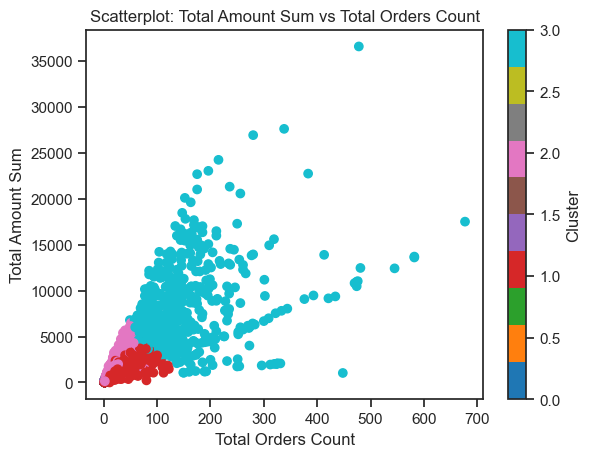

In [ ]:
import matplotlib.pyplot as plt

# Definir as variáveis para o scatterplot
x = merged_df_original['total_orders_count']
y = merged_df_original['total_amount_sum']
labels = kmeans.labels_

# Plotar o scatterplot com cores representando os clusters
plt.scatter(x, y, c=labels, cmap='tab10')
plt.xlabel('Total Orders Count')
plt.ylabel('Total Amount Sum')
plt.title('Scatterplot: Total Amount Sum vs Total Orders Count')
plt.colorbar(label='Cluster')
plt.show()


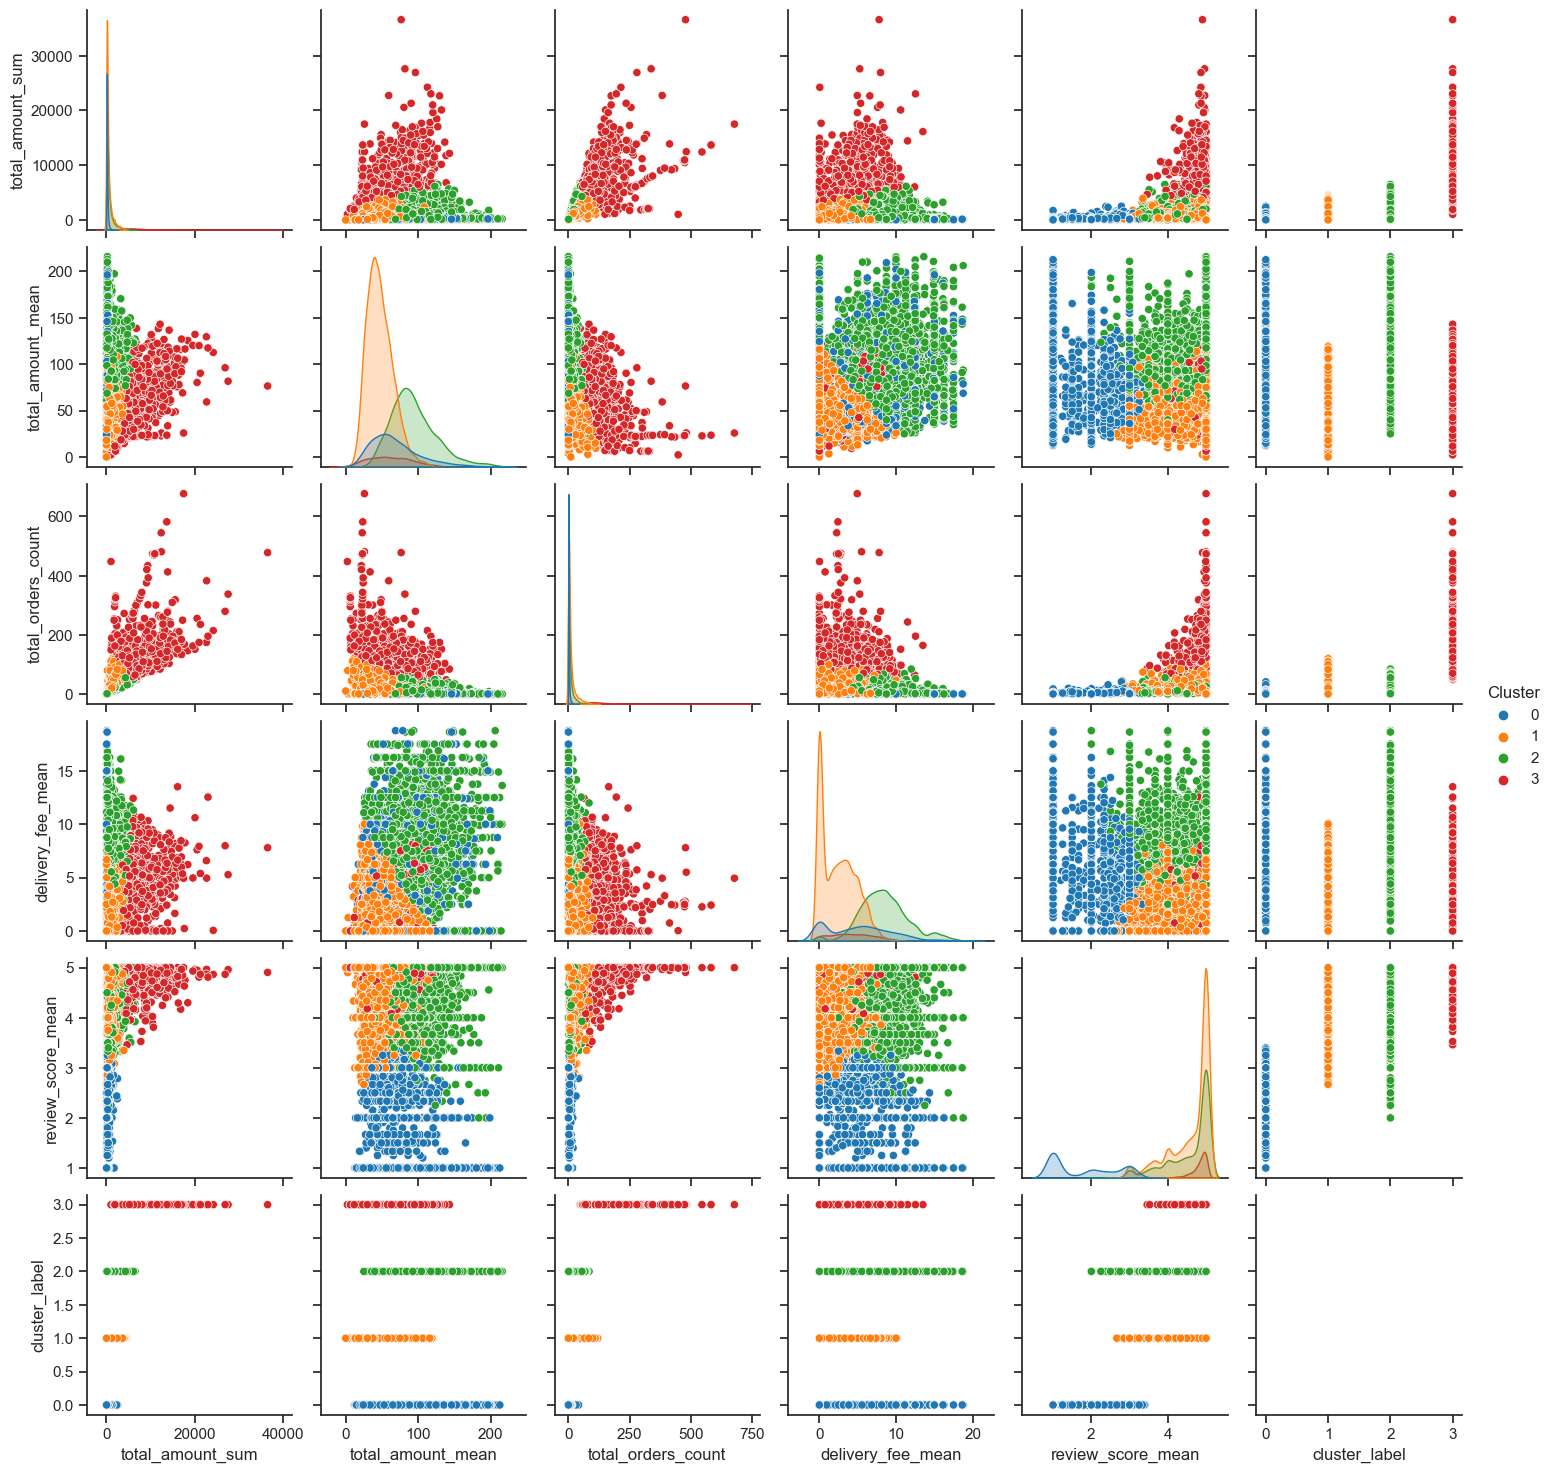

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_matrix(data, labels):
    sns.set(style="ticks")

    # Criar uma cópia do dataframe de dados
    data_with_labels = data.copy()

    # Adicionar uma nova coluna com os rótulos dos clusters como uma categoria
    data_with_labels['Cluster'] = pd.Categorical(labels)

    # Criar uma matriz de scatterplots para todos os pares de variáveis
    scatter_matrix = sns.pairplot(data_with_labels, hue='Cluster', palette="tab10")

    # Ajustar a legenda para mostrar os rótulos dos clusters
    scatter_matrix._legend.set_title('Cluster')

    # Exibir o plot
    plt.show()

# Chamar a função para plotar os scatterplots
plot_scatter_matrix(merged_df_original, labels)


Podemos observar alguns grupos muito claros e destacar algumas coisas em alguns deles:
* Grupo Azul 0 - Dão as piores notas e são os que menos compram.
* Grupo 1 Amarelo e 2 Verde - Eles ficaram parecidos, mas o verde possui uma tendencia maior a gastar mais do que o amarelo, enquanto o amarelo pede mais vzes com um ticket médio menor. A partir daqui todos os grupos são boas notas as compras.
* Grupo 3 Vermelho - Este é o grupo que está mais disposto a comprar muito e sempre, estão muito satisfeitos com nosso aplicativo.

# A partir daqui considero que não cheguei a nenhuma conclusão a mais.

* Como continuação do estudo, consideraria utilizar estes grupos acima para estudar algumas relações com os tipos de comidas mais vendidas influenciam os que mais compram e gastam.

* Também recomendaria um estudo mais profundo na tabela de sessions.


# Clusterização - por Pedidos

In [ ]:
# Dropar as colunas do DataFrame
filtered_orders_df_cluster = filtered_orders_df.drop([
    'order_id',
    'order_shift',
    'order_origin',
    'device_platform',
    'device_type',
    'device_app_version',
    'centroid_id',
    'state_label',
    'city',
    'district',
    'customer_long',
    'customer_lat',
    'restaurant_id',
    'group_id',
    'merchant_centroid_id',
    'merchant_state',
    'merchant_city',
    'merchant_district',
    'merchant_zipcode',
    'merchant_long',
    'merchant_lat',
    'confirmed_date',
    'concluded_date',
    'lag_last_order',
    'account_id',
    'review_created_at'
], axis=1)

# Verificar o resultado
filtered_orders_df_cluster.head()


delivery_fee  scheduled  total_amount  subsidy_amount          dish_type  \
0          8.75      False         53.75            0.00  Comida Brasileira   
1          0.00      False         29.88           12.50  Comida Brasileira   
2          0.00      False         37.38           21.24     Comida Peruana   
3          8.62      False         22.38            0.01              Pizza   
4          0.00      False         27.50            0.00  Comida Brasileira   

   has_free_delivery  review_score  nps_score  
0              False          5.00          8  
1               True          5.00          8  
2               True          5.00          5  
3              False          5.00         10  
4               True          5.00         10

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Crie uma cópia do dataframe original
filtered_orders_df_cluster_original = filtered_orders_df_cluster.copy()

# Colunas numéricas a serem normalizadas
numeric_columns = ['delivery_fee', 'total_amount', 'subsidy_amount', 'review_score', 'nps_score']

# Colunas categóricas a serem codificadas
categorical_columns = ['scheduled', 'dish_type', 'has_free_delivery']

# Aplicar normalização nas colunas numéricas
scaler = StandardScaler()
filtered_orders_df_cluster[numeric_columns] = scaler.fit_transform(filtered_orders_df_cluster[numeric_columns])

# Ajustar o OneHotEncoder aos dados
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit(filtered_orders_df_cluster[categorical_columns])

# Aplicar One-Hot Encoding nas colunas categóricas
transformed_data = encoder.transform(filtered_orders_df_cluster[categorical_columns])
transformed_columns = encoder.get_feature_names_out(categorical_columns)
transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns, index=filtered_orders_df_cluster.index)

# Concatenar as colunas numéricas e categóricas transformadas
filtered_orders_df_cluster_enconded = pd.concat([transformed_df, filtered_orders_df_cluster[numeric_columns]], axis=1)


In [ ]:
filtered_orders_df_cluster_enconded

scheduled_True  dish_type_Argentina  dish_type_Açaí  dish_type_Baiana  \
0                 0.00                 0.00            0.00              0.00   
1                 0.00                 0.00            0.00              0.00   
2                 0.00                 0.00            0.00              0.00   
3                 0.00                 0.00            0.00              0.00   
4                 0.00                 0.00            0.00              0.00   
...                ...                  ...             ...               ...   
226264            0.00                 0.00            0.00              0.00   
226265            0.00                 0.00            0.00              0.00   
226266            0.00                 0.00            0.00              0.00   
226267            0.00                 0.00            0.00              0.00   
226268            0.00                 0.00            0.00              0.00   

        dish_type_Bebidas  dish_type_Cafeteria  dish_type_Carnes  \
0                    0.00                 0.00              0.00   
1                    0.00                 0.00              0.00   
2                    0.00                 0.00              0.00   
3                    0.00                 0.00              0.00   
4                    0.00                 0.00              0.00   
...                   ...                  ...               ...   
226264               0.00                 0.00              0.00   
226265               0.00                 0.00              0.00   
226266               0.00                 0.00              0.00   
226267               0.00                 0.00              0.00   
226268               0.00                 0.00              0.00   

        dish_type_Casa de Sucos  dish_type_Colombiana  dish_type_Comida Alemã  \
0                          0.00                  0.00                    0.00   
1                          0.00                  0.00                    0.00   
2                          0.00                  0.00                    0.00   
3                          0.00                  0.00                    0.00   
4                          0.00                  0.00                    0.00   
...                         ...                   ...                     ...   
226264                     0.00                  0.00                    0.00   
226265                     0.00                  0.00                    0.00   
226266                     0.00                  0.00                    0.00   
226267                     0.00                  0.00                    0.00   
226268                     0.00                  0.00                    0.00   

        dish_type_Comida Asiática  dish_type_Comida Brasileira  \
0                            0.00                         1.00   
1                            0.00                         1.00   
2                            0.00                         0.00   
3                            0.00                         0.00   
4                            0.00                         1.00   
...                           ...                          ...   
226264                       0.00                         0.00   
226265                       0.00                         0.00   
226266                       0.00                         0.00   
226267                       0.00                         1.00   
226268                       0.00                         0.00   

        dish_type_Comida Chinesa  dish_type_Comida Contemporânea  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   
...                          ...            

## K-Means

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans

cluster_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in cluster_range:
    # Criar uma instância do KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o modelo aos dados
    kmeans.fit(filtered_orders_df_cluster_enconded)

    # Obter as etiquetas de cluster atribuídas a cada amostra
    labels = kmeans.labels_

    # Calcular as métricas de avaliação
    silhouette = silhouette_score(filtered_orders_df_cluster_enconded, labels)
    davies_bouldin = davies_bouldin_score(filtered_orders_df_cluster_enconded, labels)
    calinski = calinski_harabasz_score(filtered_orders_df_cluster_enconded, labels)

    # Imprimir os resultados
    print(f"Número de clusters: {n_clusters}")
    print(f"Silhouette: {silhouette}")
    print(f"Índice Davies-Bouldin: {davies_bouldin}")
    print(f"Índice Calinski-Harabasz: {calinski}")
    print()


<style>
  table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
  }

  th, td {
    padding: 8px;
    text-align: left;
    border-bottom: 1px solid #ddd;
  }

  th {

    font-weight: bold;
  }

  td {
    font-size: 14px;
  }
</style>

<table>
  <tr>
    <th>Número de clusters</th>
    <th>Silhouette</th>
    <th>Índice Davies-Bouldin</th>
    <th>Índice Calinski-Harabasz</th>
  </tr>
  <tr>
    <td>2</td>
    <td>0.217</td>
    <td>1.845</td>
    <td>50596.640</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0.234</td>
    <td>1.516</td>
    <td>54761.435</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0.243</td>
    <td>1.369</td>
    <td>55349.687</td>
  </tr>
  <tr>
    <td>5</td>
    <td>0.255</td>
    <td>1.329</td>
    <td>51839.141</td>
  </tr>
  <tr>
    <td>6</td>
    <td>0.239</td>
    <td>1.357</td>
    <td>51432.554</td>
  </tr>
  <tr>
    <td>7</td>
    <td>0.243</td>
    <td>1.349</td>
    <td>47593.796</td>
  </tr>
  <tr>
    <td>8</td>
    <td>0.238</td>
    <td>1.337</td>
    <td>45286.374</td>
  </tr>
  <tr>
    <td>9</td>
    <td>0.240</td>
    <td>1.368</td>
    <td>42555.314</td>
  </tr>
  <tr>
    <td>10</td>
    <td>0.211</td>
    <td>1.508</td>
    <td>40318.973</td>
  </tr>
</table>


## Interpretando os clusteres - 3

In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters desejado
n_clusters = 3

# Criar uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(filtered_orders_df_cluster_enconded)

# Obter as etiquetas de cluster atribuídas a cada amostra
labels = kmeans.labels_

# Verificar os rótulos dos clusters
print(labels)


[1 0 0 ... 1 2 1]


In [ ]:
filtered_orders_df_cluster_original

delivery_fee  scheduled  total_amount  subsidy_amount  \
0               8.75      False         53.75            0.00   
1               0.00      False         29.88           12.50   
2               0.00      False         37.38           21.24   
3               8.62      False         22.38            0.01   
4               0.00      False         27.50            0.00   
...              ...        ...           ...             ...   
226264          3.75      False        104.38            0.00   
226265          8.74      False         63.49            0.00   
226266          8.75      False         85.12            0.01   
226267          0.00      False         35.00            8.74   
226268          6.12      False         50.94            0.00   

                dish_type  has_free_delivery  review_score  nps_score  \
0       Comida Brasileira              False          5.00          8   
1       Comida Brasileira               True          5.00          8   
2          Comida Peruana               True          5.00          5   
3                   Pizza              False          5.00         10   
4       Comida Brasileira               True          5.00         10   
...                   ...                ...           ...        ...   
226264            Lanches              False          5.00         10   
226265            Padaria              False          5.00         10   
226266              Pizza              False          5.00         10   
226267  Comida Brasileira               True          4.00          1   
226268      Doces & Bolos              False          5.00         10   

        cluster_label  
0                   1  
1                   0  
2                   0  
3                   1  
4                   0  
...               ...  
226264              1  
226265              1  
226266              1  
226267              2  
226268              1  

[212579 rows x 9 columns]

In [ ]:
# Adicione a coluna de rótulos de cluster ao dataframe original
filtered_orders_df_cluster_original['cluster_label'] = labels
cluster_profiles = filtered_orders_df_cluster_original.groupby('cluster_label').describe()
cluster_profiles

delivery_fee                                      total_amount  \
                     count mean  std  min  25%  50%   75%   max        count   
cluster_label                                                                  
0                110542.00 0.36 1.26 0.00 0.00 0.00  0.00 10.00    110542.00   
1                 81631.00 8.77 3.63 0.00 6.24 8.62 11.00 18.75     81631.00   
2                 20406.00 4.54 5.01 0.00 0.00 3.75  8.74 18.75     20406.00   

                                                        subsidy_amount       \
               mean   std  min   25%   50%   75%    max          count mean   
cluster_label                                                                 
0             41.59 29.09 0.00 22.38 33.12 52.50 216.62      110542.00 4.20   
1             73.96 43.10 7.50 41.24 62.49 95.24 216.78       81631.00 1.07   
2             66.34 40.65 6.25 36.12 55.49 85.62 216.75       20406.00 3.38   

                                              review_score                 \
               std   min  25%  50%  75%   max        count mean  std  min   
cluster_label                                                               
0             6.13 -0.01 0.00 0.00 7.49 23.78    110542.00 4.91 0.34 3.00   
1             3.38 -0.02 0.00 0.00 0.00 23.78     81631.00 4.89 0.38 2.00   
2             5.59 -0.01 0.00 0.00 6.25 23.76     20406.00 2.42 1.50 1.00   

                                  nps_score                                   \
               25%  50%  75%  max     count mean  std  min   25%   50%   75%   
cluster_label                                                                  
0             5.00 5.00 5.00 5.00 110542.00 9.54 1.05 3.00 10.00 10.00 10.00   
1             5.00 5.00 5.00 5.00  81631.00 9.43 1.14 2.00  9.00 10.00 10.00   
2             1.00 2.00 3.00 5.00  20406.00 5.36 3.35 1.00  1.00  6.00  8.00   

                     
                max  
cluster_label        
0             10.00  
1             10.00  
2             10.00

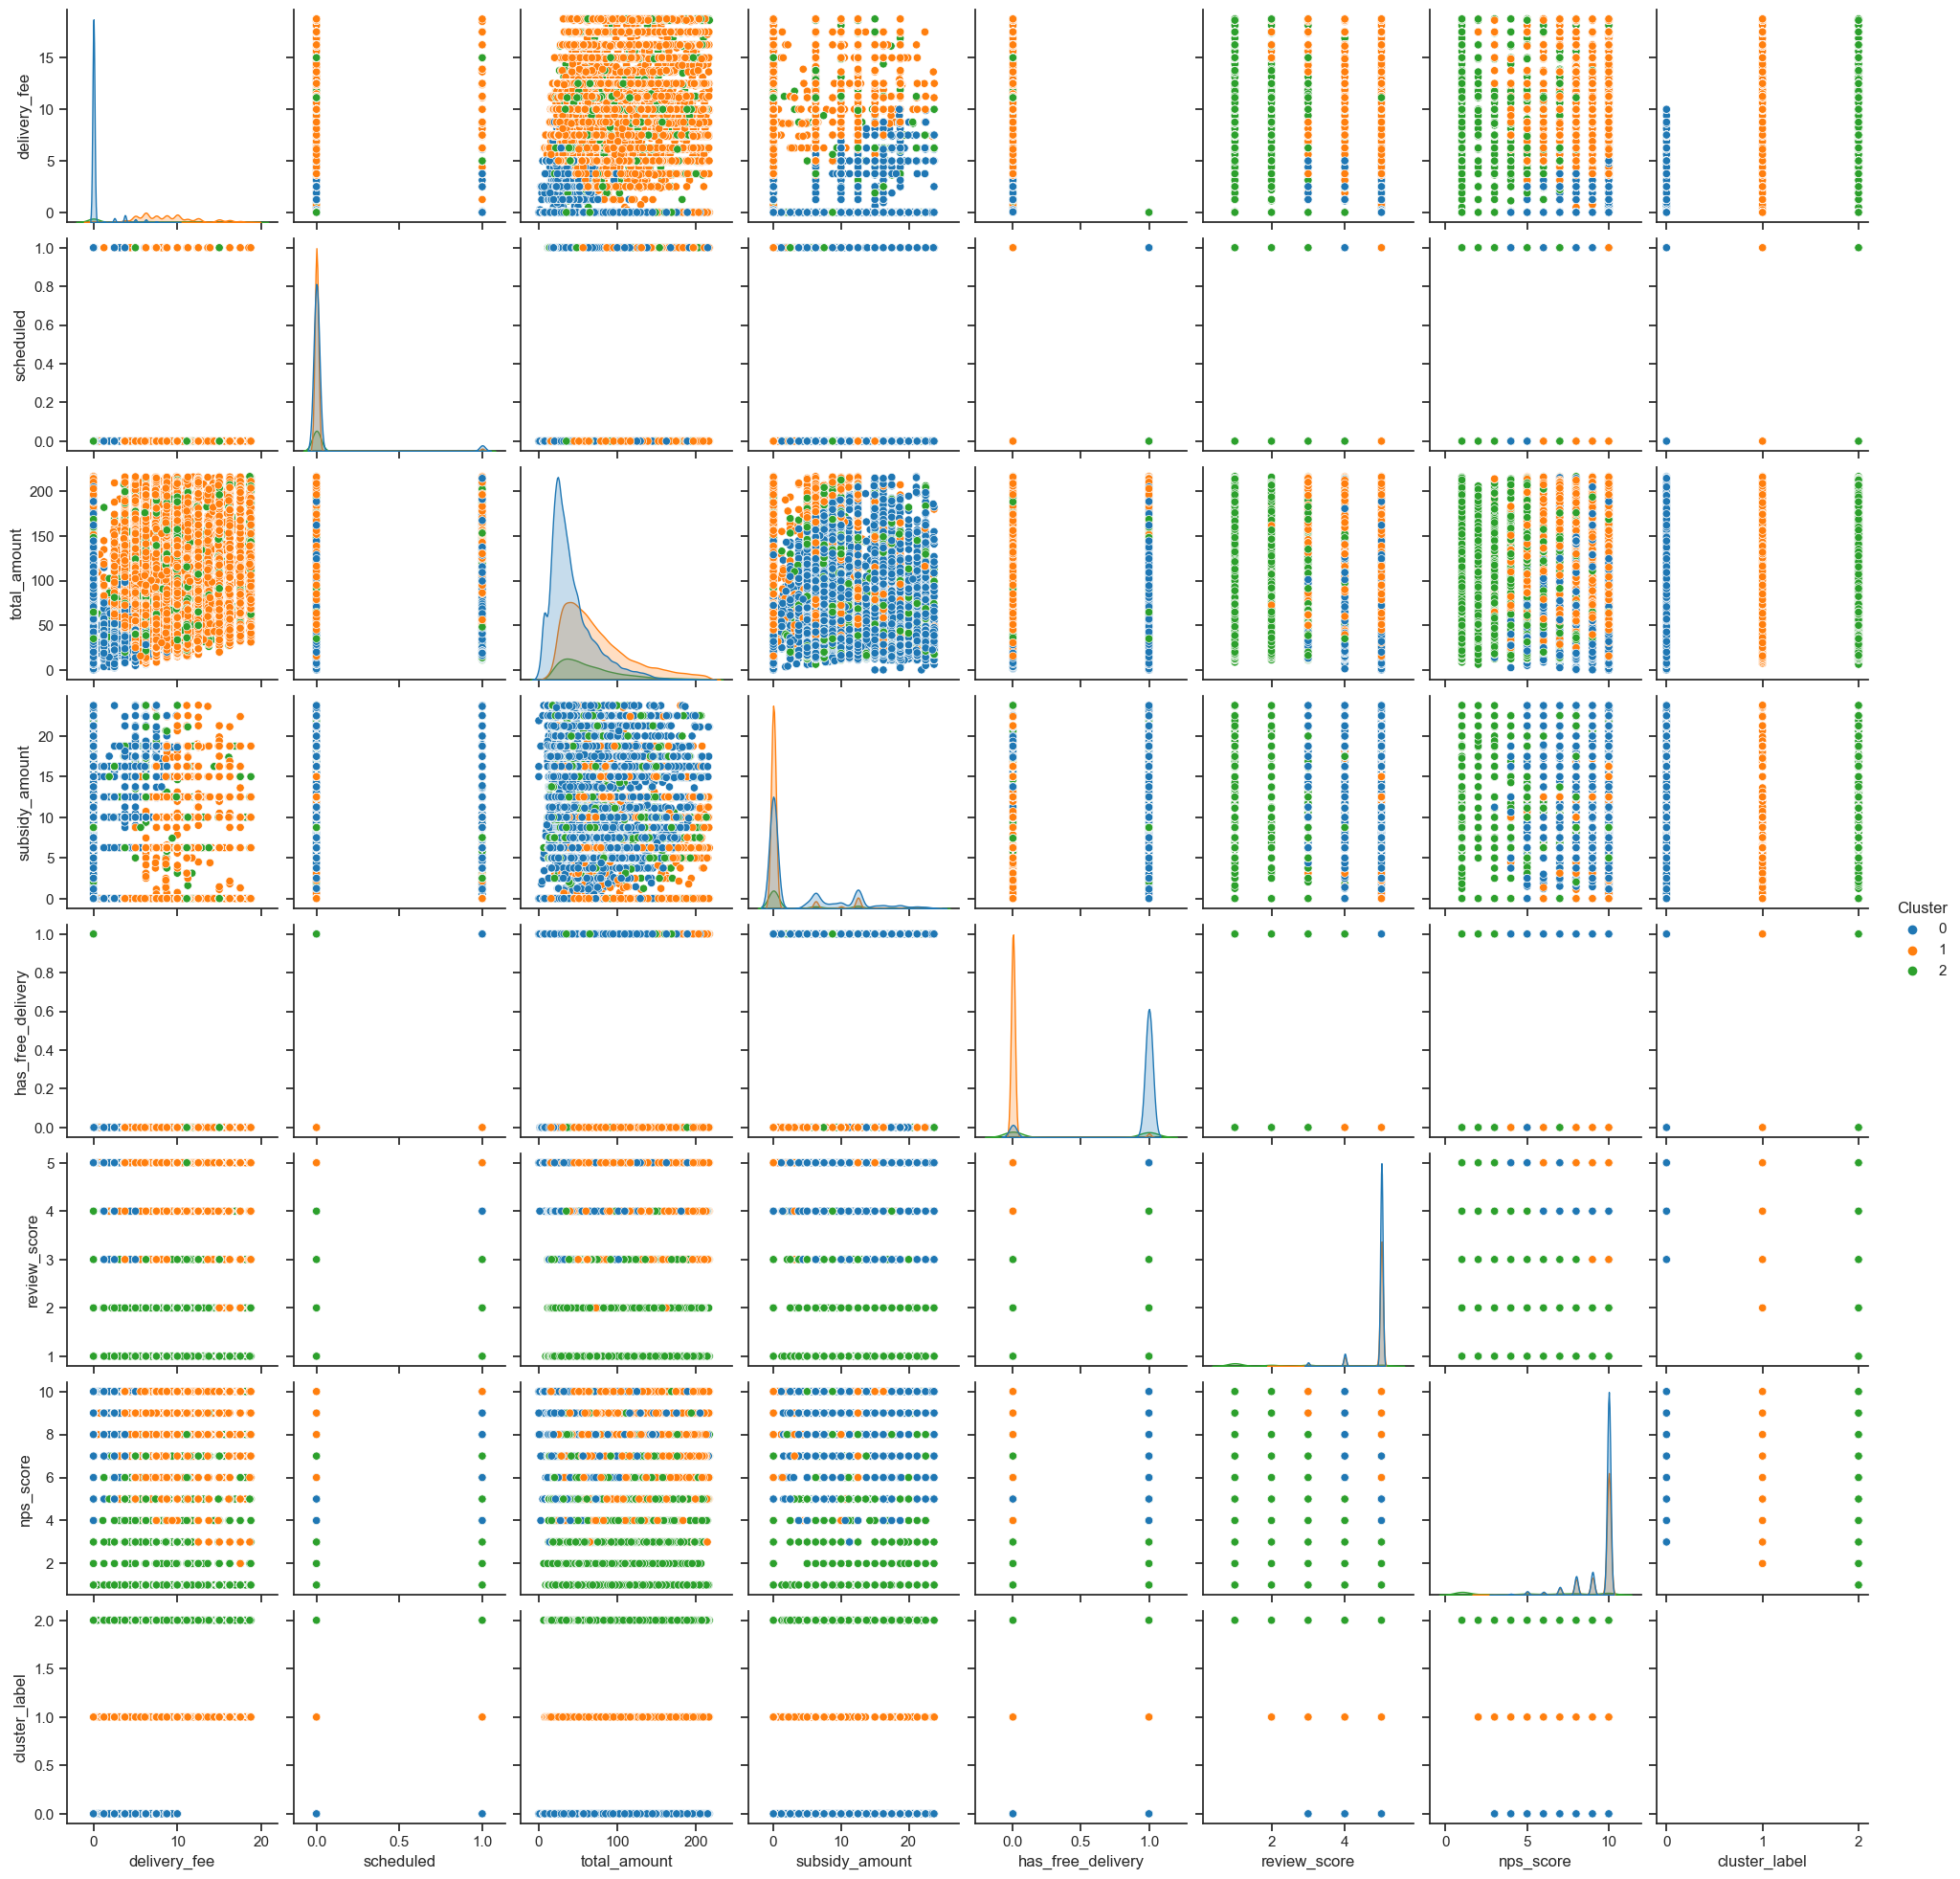

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_matrix(data, labels):
    sns.set(style="ticks")

    # Criar uma cópia do dataframe de dados
    data_with_labels = data.copy()

    # Adicionar uma nova coluna com os rótulos dos clusters como uma categoria
    data_with_labels['Cluster'] = pd.Categorical(labels)

    # Criar uma matriz de scatterplots para todos os pares de variáveis
    scatter_matrix = sns.pairplot(data_with_labels, hue='Cluster', palette="tab10")

    # Ajustar a legenda para mostrar os rótulos dos clusters
    scatter_matrix._legend.set_title('Cluster')

    # Exibir o plot
    plt.show()

# Chamar a função para plotar os scatterplots
plot_scatter_matrix(filtered_orders_df_cluster_original, labels)


## Interpretando os clusteres - 4

In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters desejado
n_clusters = 4

# Criar uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(filtered_orders_df_cluster_enconded)

# Obter as etiquetas de cluster atribuídas a cada amostra
labels = kmeans.labels_

# Verificar os rótulos dos clusters
print(labels)
filtered_orders_df_cluster_enconded

[2 3 3 ... 2 0 2]


In [ ]:
# Adicione a coluna de rótulos de cluster ao dataframe original
filtered_orders_df_cluster_original['cluster_label'] = labels

In [ ]:
cluster_profiles = filtered_orders_df_cluster_original.groupby('cluster_label').describe()

In [ ]:
cluster_profiles

delivery_fee                                      total_amount  \
                     count mean  std  min  25%  50%   75%   max        count   
cluster_label                                                                  
0                 19167.00 4.69 5.01 0.00 0.00 4.38  8.74 18.75     19167.00   
1                 90309.00 0.79 1.80 0.00 0.00 0.00  0.00  7.50     90309.00   
2                 68444.00 9.25 3.66 0.00 6.25 8.74 11.24 18.75     68444.00   
3                 34659.00 1.55 3.22 0.00 0.00 0.00  0.00 18.75     34659.00   

                                                          subsidy_amount  \
               mean   std   min   25%   50%    75%    max          count   
cluster_label                                                              
0             66.53 40.08  6.25 36.86 56.11  85.69 216.75       19167.00   
1             37.59 24.82  0.01 21.24 31.24  47.50 143.59       90309.00   
2             81.08 43.13 13.62 48.50 70.00 103.74 216.78       68444.00   
3             51.05 33.95  0.00 27.49 39.95  62.88 216.62       34659.00   

                                                       review_score            \
               mean  std   min   25%   50%   75%   max        count mean  std   
cluster_label                                                                   
0              2.77 4.93 -0.01  0.00  0.00  6.24 23.76     19167.00 2.36 1.50   
1              0.77 2.00 -0.01  0.00  0.00  0.00  7.70     90309.00 4.93 0.31   
2              0.58 2.29 -0.02  0.00  0.00  0.00 18.76     68444.00 4.88 0.40   
3             13.21 3.92  4.99 10.00 12.50 15.00 23.78     34659.00 4.82 0.52   

                                       nps_score                             \
               min  25%  50%  75%  max     count mean  std  min   25%   50%   
cluster_label                                                                 
0             1.00 1.00 2.00 3.00 5.00  19167.00 5.28 3.37 1.00  1.00  5.00   
1             3.00 5.00 5.00 5.00 5.00  90309.00 9.61 0.97 3.00 10.00 10.00   
2             2.00 5.00 5.00 5.00 5.00  68444.00 9.39 1.18 1.00  9.00 10.00   
3             1.00 5.00 5.00 5.00 5.00  34659.00 9.28 1.38 1.00  9.00 10.00   

                           
                75%   max  
cluster_label              
0              8.00 10.00  
1             10.00 10.00  
2             10.00 10.00  
3             10.00 10.00

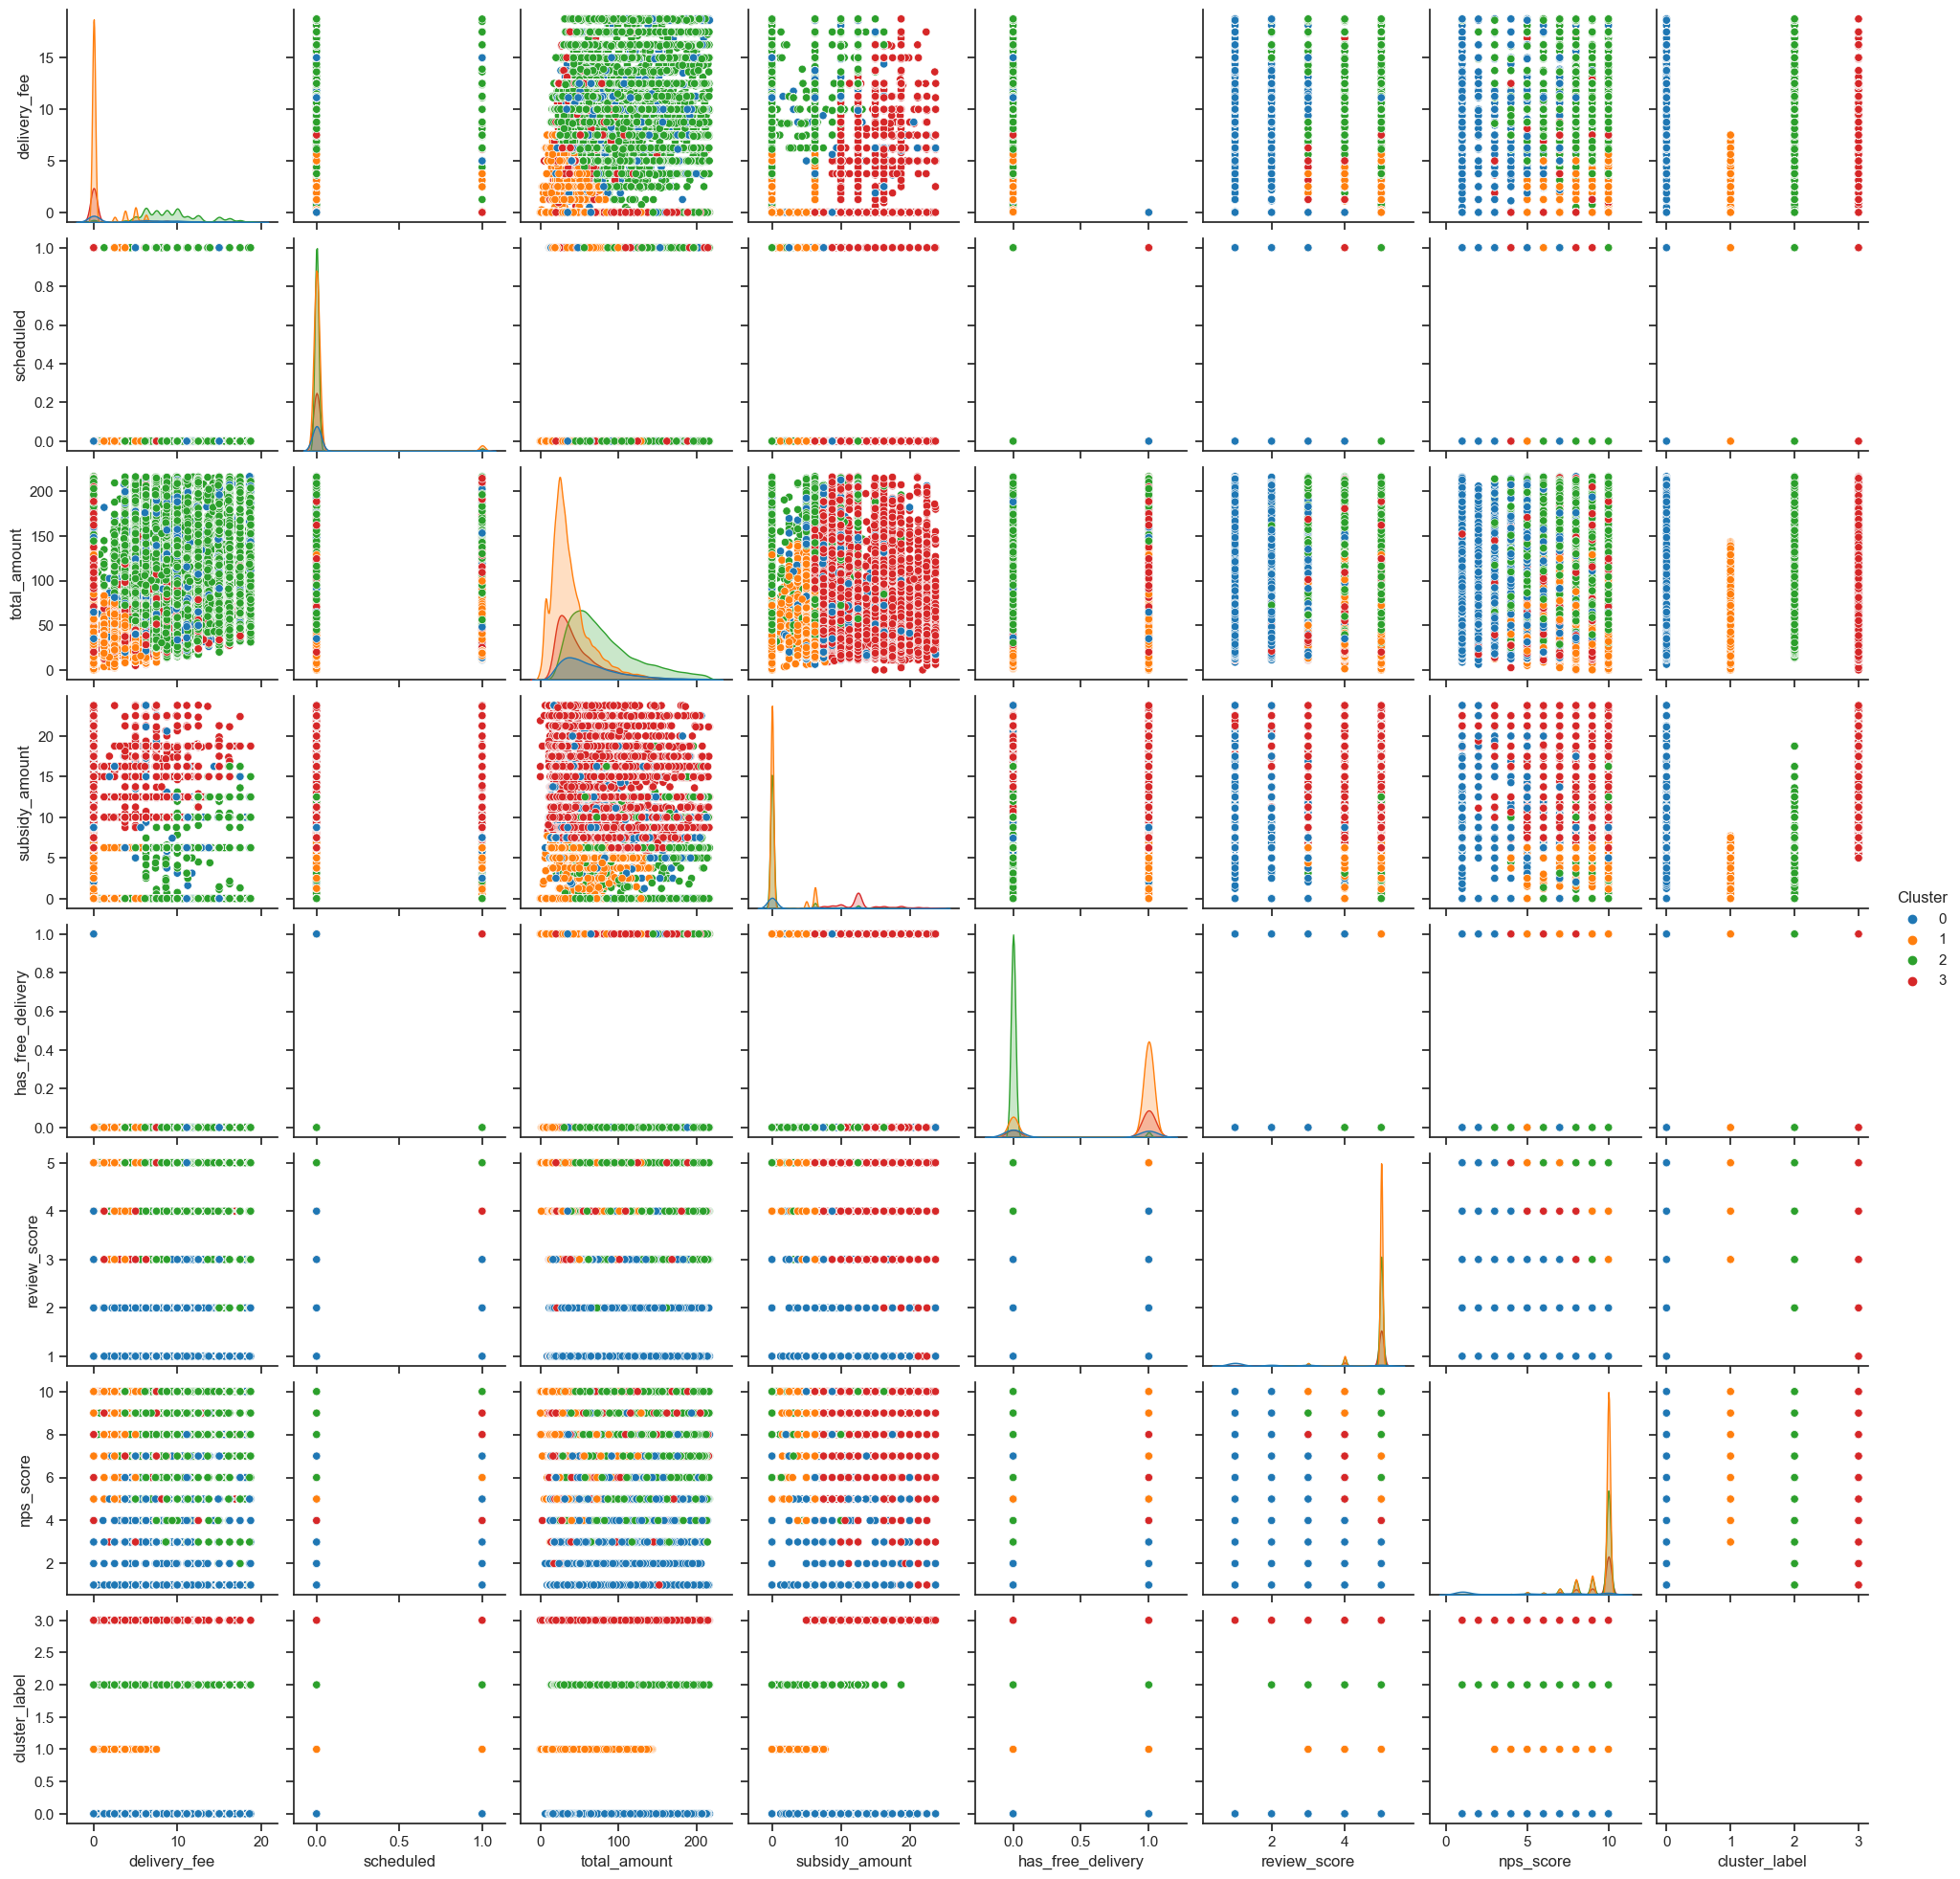

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_matrix(data, labels):
    sns.set(style="ticks")

    # Criar uma cópia do dataframe de dados
    data_with_labels = data.copy()

    # Adicionar uma nova coluna com os rótulos dos clusters como uma categoria
    data_with_labels['Cluster'] = pd.Categorical(labels)

    # Criar uma matriz de scatterplots para todos os pares de variáveis
    scatter_matrix = sns.pairplot(data_with_labels, hue='Cluster', palette="tab10")

    # Ajustar a legenda para mostrar os rótulos dos clusters
    scatter_matrix._legend.set_title('Cluster')

    # Exibir o plot
    plt.show()

# Chamar a função para plotar os scatterplots
plot_scatter_matrix(filtered_orders_df_cluster_original, labels)


## Interpretando os clusteres - 5

In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters desejado
n_clusters = 5

# Criar uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(filtered_orders_df_cluster_enconded)

# Obter as etiquetas de cluster atribuídas a cada amostra
labels = kmeans.labels_

# Verificar os rótulos dos clusters
print(labels)

[4 0 0 ... 4 2 4]


In [ ]:
# Adicione a coluna de rótulos de cluster ao dataframe original
filtered_orders_df_cluster_original['cluster_label'] = labels
cluster_profiles = filtered_orders_df_cluster_original.groupby('cluster_label').describe()
cluster_profiles

delivery_fee                                      total_amount  \
                     count mean  std  min  25%  50%   75%   max        count   
cluster_label                                                                  
0                 33400.00 1.55 3.24 0.00 0.00 0.00  0.00 18.75     33400.00   
1                 88288.00 0.80 1.81 0.00 0.00 0.00  0.00  7.50     88288.00   
2                 10076.00 4.04 4.67 0.00 0.00 2.50  7.49 18.75     10076.00   
3                 14409.00 4.78 5.11 0.00 0.00 4.88  8.74 18.75     14409.00   
4                 66406.00 9.28 3.66 0.00 6.25 8.74 11.24 18.75     66406.00   

                                                          subsidy_amount  \
               mean   std   min   25%   50%    75%    max          count   
cluster_label                                                              
0             51.04 34.04  0.00 27.48 39.88  62.88 216.62       33400.00   
1             37.40 24.76  0.01 21.12 31.12  47.49 142.89       88288.00   
2             61.52 36.25  2.50 35.00 52.25  77.99 216.18       10076.00   
3             66.97 40.94  8.62 36.25 56.12  86.40 216.75       14409.00   
4             81.27 43.27 13.62 48.50 70.25 104.11 216.78       66406.00   

                                                       review_score            \
               mean  std   min   25%   50%   75%   max        count mean  std   
cluster_label                                                                   
0             13.26 3.91  4.99 10.00 12.50 15.00 23.78     33400.00 4.84 0.47   
1              0.76 1.99 -0.01  0.00  0.00  0.00  7.70     88288.00 4.92 0.32   
2              2.82 4.80 -0.01  0.00  0.00  6.24 23.74     10076.00 4.78 0.51   
3              3.02 5.27 -0.01  0.00  0.00  6.24 23.76     14409.00 1.59 0.77   
4              0.58 2.28 -0.02  0.00  0.00  0.00 18.76     66406.00 4.88 0.39   

                                       nps_score                             \
               min  25%  50%  75%  max     count mean  std  min   25%   50%   
cluster_label                                                                 
0             2.00 5.00 5.00 5.00 5.00  33400.00 9.45 1.03 3.00  9.00 10.00   
1             3.00 5.00 5.00 5.00 5.00  88288.00 9.71 0.70 6.00 10.00 10.00   
2             3.00 5.00 5.00 5.00 5.00  10076.00 3.57 1.92 1.00  1.00  4.00   
3             1.00 1.00 1.00 2.00 3.00  14409.00 6.43 3.15 1.00  5.00  7.00   
4             2.00 5.00 5.00 5.00 5.00  66406.00 9.52 0.91 5.00  9.00 10.00   

                           
                75%   max  
cluster_label              
0             10.00 10.00  
1             10.00 10.00  
2              5.00  7.00  
3              9.00 10.00  
4             10.00 10.00

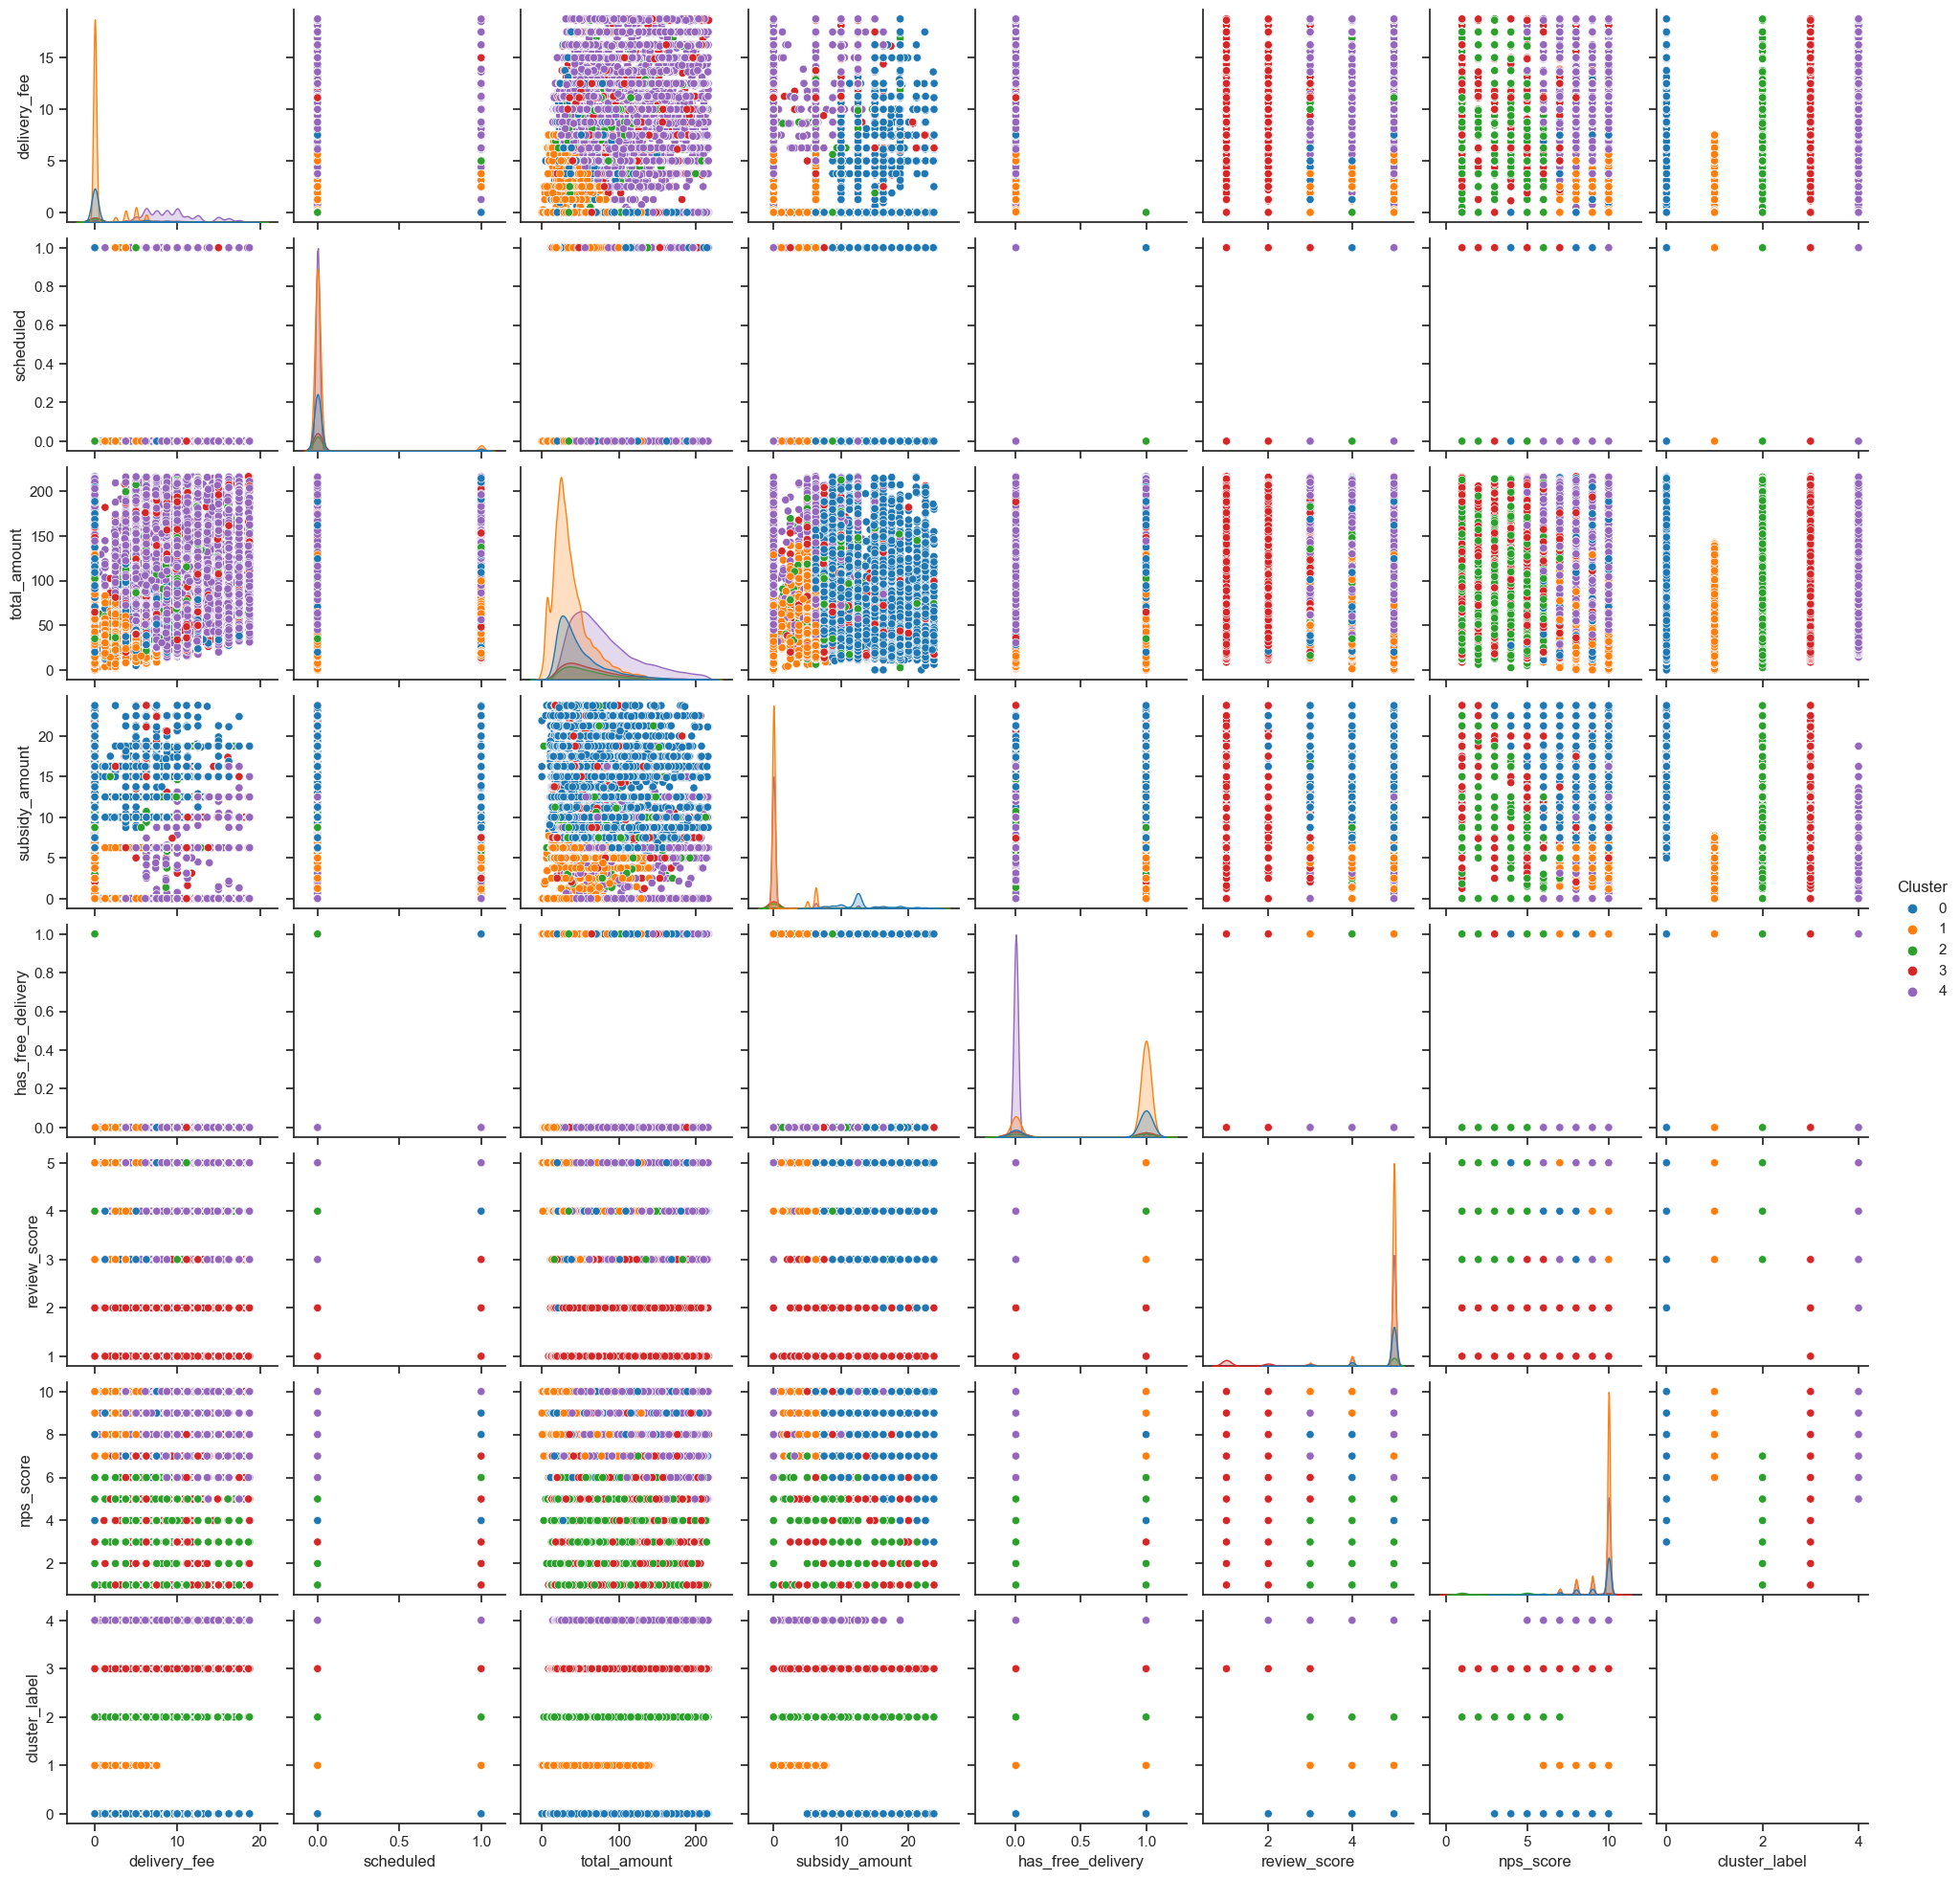

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_matrix(data, labels):
    sns.set(style="ticks")

    # Criar uma cópia do dataframe de dados
    data_with_labels = data.copy()

    # Adicionar uma nova coluna com os rótulos dos clusters como uma categoria
    data_with_labels['Cluster'] = pd.Categorical(labels)

    # Criar uma matriz de scatterplots para todos os pares de variáveis
    scatter_matrix = sns.pairplot(data_with_labels, hue='Cluster', palette="tab10")

    # Ajustar a legenda para mostrar os rótulos dos clusters
    scatter_matrix._legend.set_title('Cluster')

    # Exibir o plot
    plt.show()

# Chamar a função para plotar os scatterplots
plot_scatter_matrix(filtered_orders_df_cluster_original, labels)


## Interpretando os clusteres - 6

In [ ]:
from sklearn.cluster import KMeans

# Definir o número de clusters desejado
n_clusters = 6

# Criar uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(filtered_orders_df_cluster_enconded)

# Obter as etiquetas de cluster atribuídas a cada amostra
labels = kmeans.labels_

# Verificar os rótulos dos clusters
print(labels)

[1 5 5 ... 1 2 1]


In [ ]:
# Adicione a coluna de rótulos de cluster ao dataframe original
filtered_orders_df_cluster_original['cluster_label'] = labels
cluster_profiles = filtered_orders_df_cluster_original.groupby('cluster_label').describe()
cluster_profiles

delivery_fee                                      total_amount  \
                     count mean  std  min  25%  50%   75%   max        count   
cluster_label                                                                  
0                 74138.00 0.05 0.35 0.00 0.00 0.00  0.00  3.12     74138.00   
1                 58630.00 7.95 3.24 1.25 5.62 7.49  9.99 18.75     58630.00   
2                  9868.00 4.02 4.68 0.00 0.00 1.25  7.49 18.75      9868.00   
3                 14142.00 4.76 5.11 0.00 0.00 4.38  8.74 18.75     14142.00   
4                 24046.00 9.12 5.15 0.00 6.24 9.99 12.49 18.75     24046.00   
5                 31755.00 1.65 3.34 0.00 0.00 0.00  0.00 18.75     31755.00   

                                                             subsidy_amount  \
                mean   std   min    25%    50%    75%    max          count   
cluster_label                                                                 
0              37.51 24.40  0.01  20.00  31.25  49.75 121.25       74138.00   
1              50.23 20.05  7.50  33.62  48.38  65.93  99.12       58630.00   
2              59.44 33.23  5.00  34.99  51.25  75.99 216.18        9868.00   
3              65.76 39.30  8.62  36.25  55.99  84.99 216.75       14142.00   
4             134.29 32.59 77.38 107.12 127.50 155.73 216.78       24046.00   
5              47.78 28.65  0.00  27.25  38.75  60.62 216.62       31755.00   

                                                       review_score            \
               mean  std   min   25%   50%   75%   max        count mean  std   
cluster_label                                                                   
0              0.91 2.16 -0.01  0.00  0.00  0.00  7.70     74138.00 4.92 0.33   
1              0.45 1.84 -0.02  0.00  0.00  0.00 15.00     58630.00 4.91 0.35   
2              2.84 4.81 -0.01  0.00  0.00  6.24 23.74      9868.00 4.78 0.51   
3              3.05 5.29 -0.01  0.00  0.00  6.24 23.76     14142.00 1.57 0.76   
4              1.07 3.17 -0.02  0.00  0.00  0.00 23.75     24046.00 4.83 0.48   
5             13.54 3.78  6.24 12.49 12.50 16.24 23.78     31755.00 4.83 0.48   

                                       nps_score                             \
               min  25%  50%  75%  max     count mean  std  min   25%   50%   
cluster_label                                                                 
0             3.00 5.00 5.00 5.00 5.00  74138.00 9.70 0.71 6.00 10.00 10.00   
1             3.00 5.00 5.00 5.00 5.00  58630.00 9.63 0.80 6.00 10.00 10.00   
2             3.00 5.00 5.00 5.00 5.00   9868.00 3.53 1.91 1.00  1.00  4.00   
3             1.00 1.00 1.00 2.00 3.00  14142.00 6.39 3.16 1.00  5.00  7.00   
4             1.00 5.00 5.00 5.00 5.00  24046.00 9.35 1.10 3.00  9.00 10.00   
5             1.00 5.00 5.00 5.00 5.00  31755.00 9.44 1.03 3.00  9.00 10.00   

                           
                75%   max  
cluster_label              
0             10.00 10.00  
1             10.00 10.00  
2              5.00  7.00  
3              9.00 10.00  
4             10.00 10.00  
5             10.00 10.00

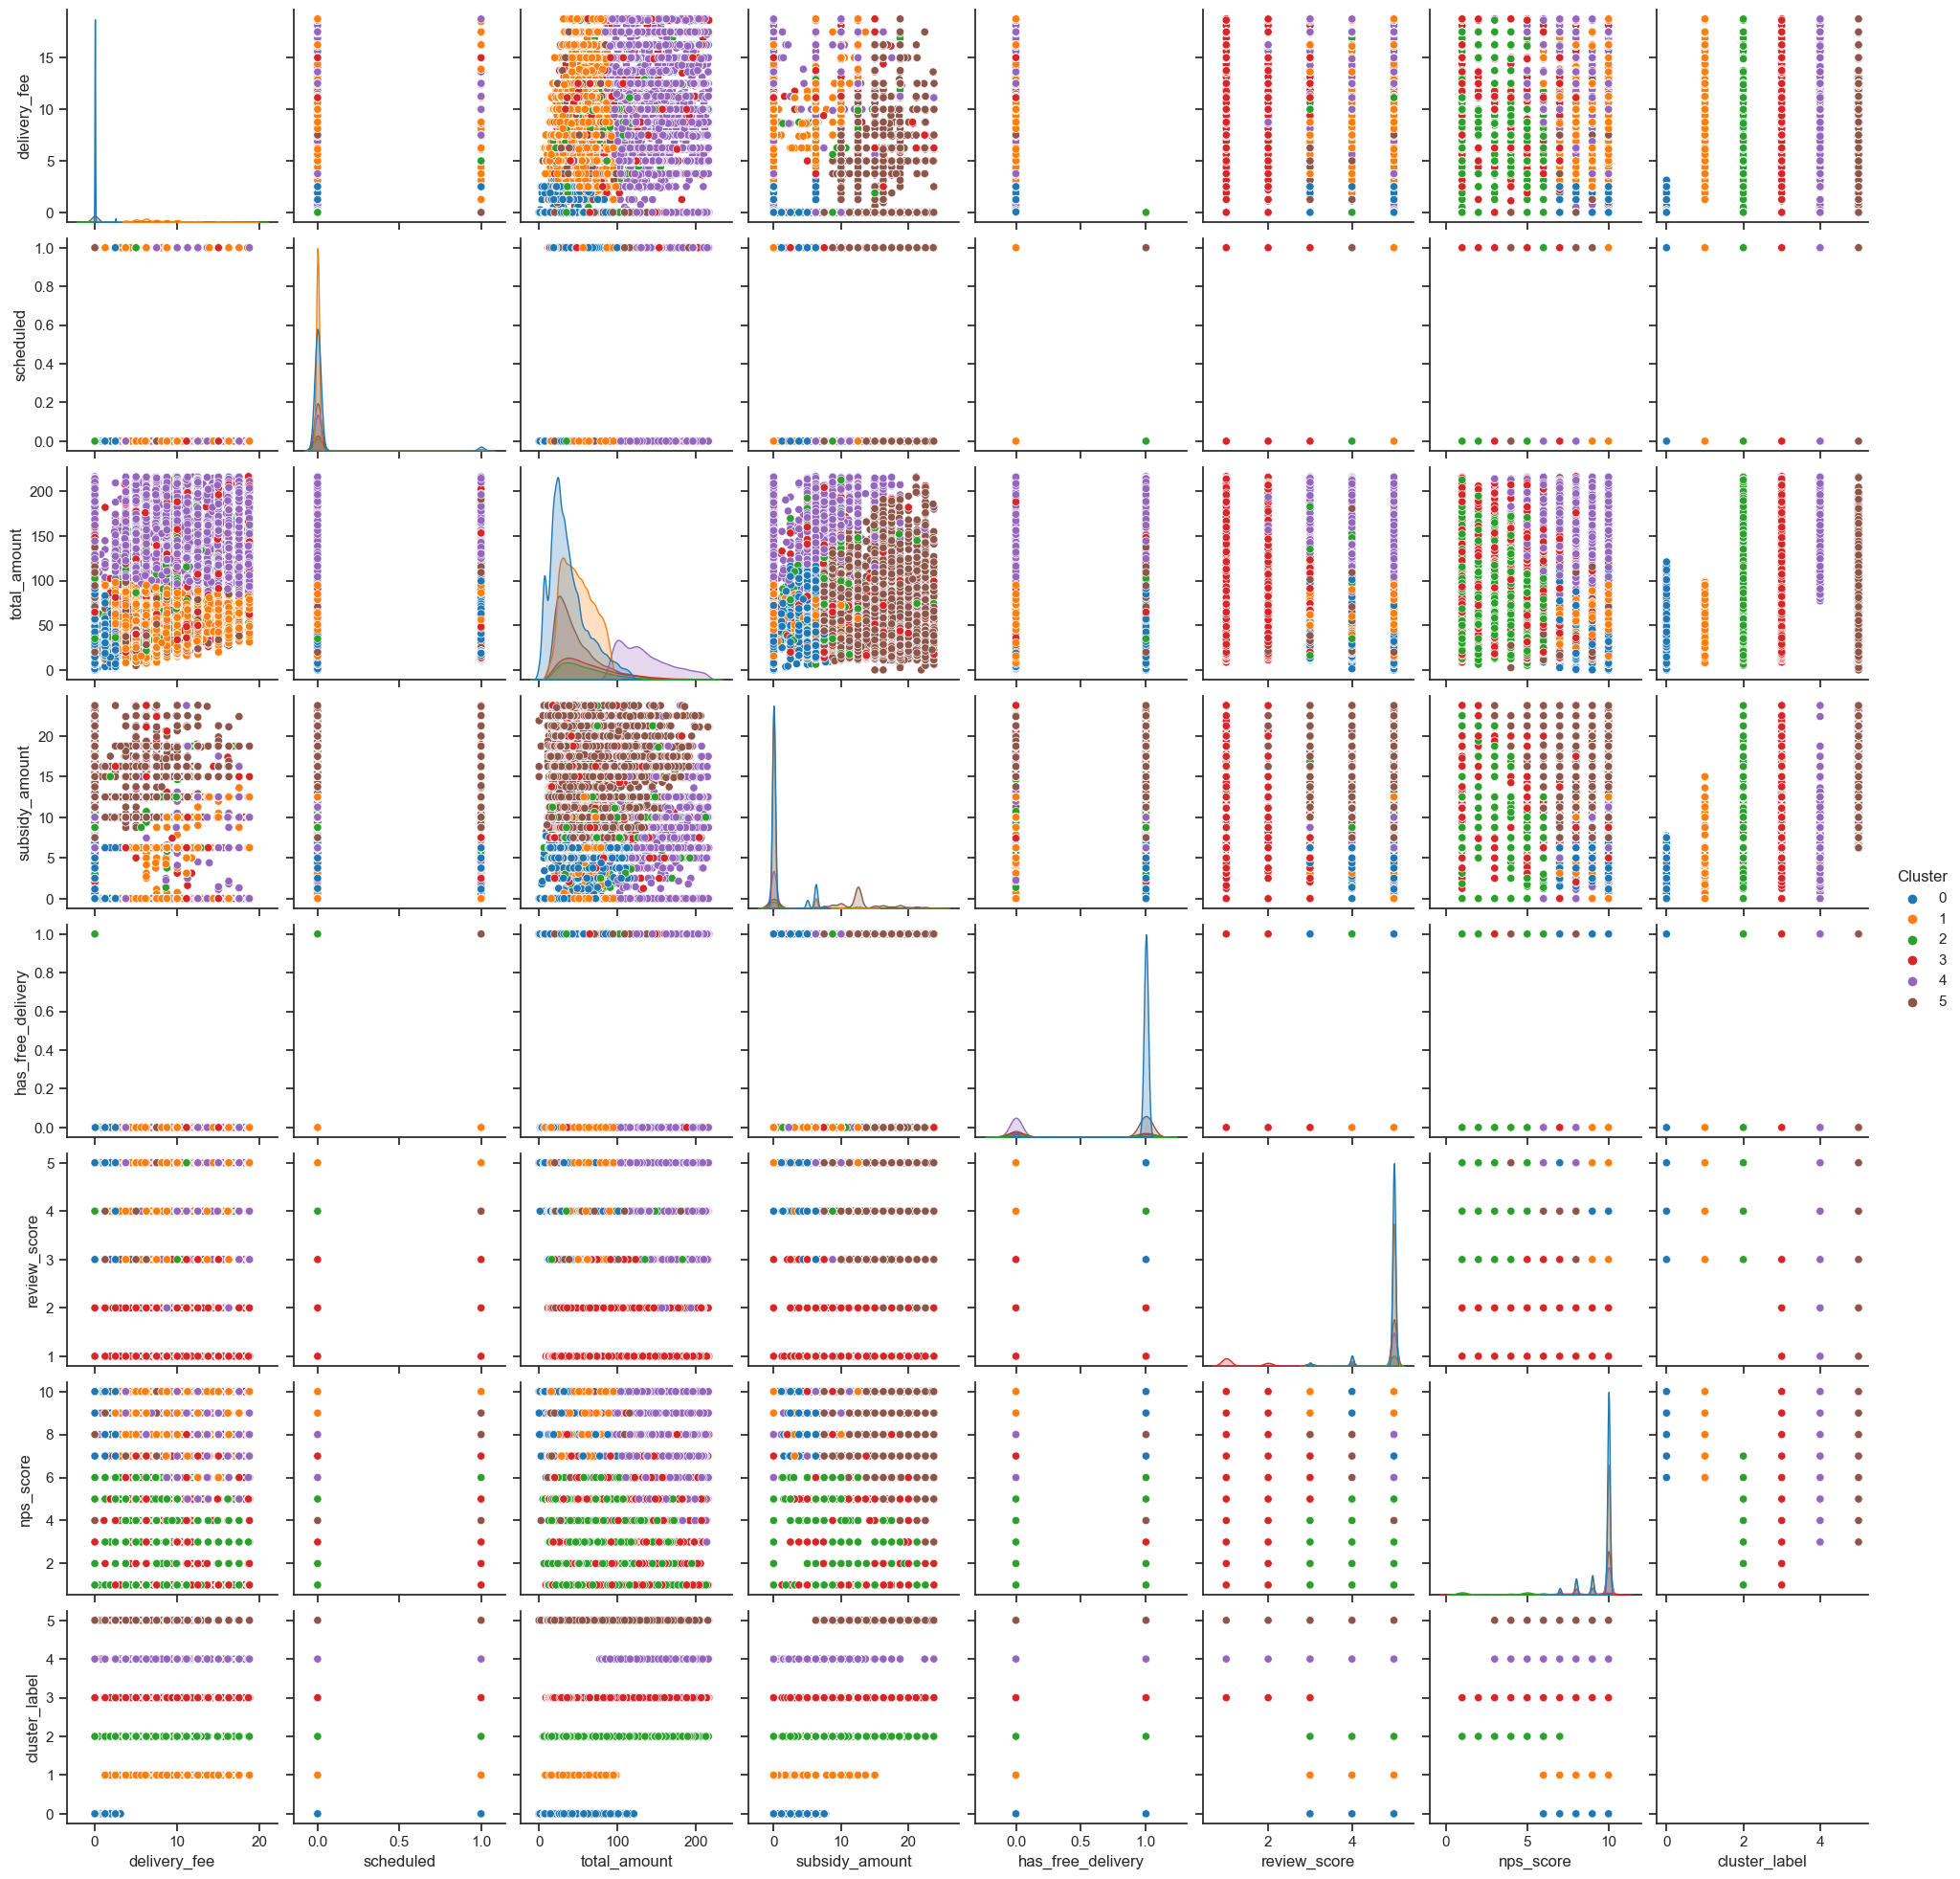

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_scatter_matrix(data, labels):
    sns.set(style="ticks")

    # Criar uma cópia do dataframe de dados
    data_with_labels = data.copy()

    # Adicionar uma nova coluna com os rótulos dos clusters como uma categoria
    data_with_labels['Cluster'] = pd.Categorical(labels)

    # Criar uma matriz de scatterplots para todos os pares de variáveis
    scatter_matrix = sns.pairplot(data_with_labels, hue='Cluster', palette="tab10")

    # Ajustar a legenda para mostrar os rótulos dos clusters
    scatter_matrix._legend.set_title('Cluster')

    # Exibir o plot
    plt.show()

# Chamar a função para plotar os scatterplots
plot_scatter_matrix(filtered_orders_df_cluster_original, labels)
